<a href="https://colab.research.google.com/github/francji1/01ZLMA/blob/main/hw/01ZLMA_assignment_2025_R_Maryshchyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment for Course 01ZLMA in 2024/2025

The assignment should be completed on patient data where heart disease was diagnosed.

The original dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Various analyses and visualizations of this dataset can also be found here: https://www.kaggle.com/ronitf/heart-disease-uci (another notation, different NaN manipulation, etc ...)

However, for this assignment, the data have been slightly modified and split as available from the link below.

## 00 - Data description


    age:
    sex:
        0: Female
        1: Male
    chest_pain_type: Chest Pain Type
        0: asymptomatic
        1: atypical angina
        2: non-anginal pain
        3: typical angina
    blood_pressure: Resting Blood Pressure: Person's resting blood pressure
    cholesterol: Serum Cholesterol in mg/dl
    blood_sugar: Fasting Blood Sugar
        0:Less Than 120mg/ml
        1: Greater Than 120mg/ml
    rest_ecg: Resting Electrocardiographic Measurement
        0: showing probable or definite left ventricular hypertrophy by Estes' criteria
        1: normal
        2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    heart_rate: Max Heart Rate Achieved: Maximum Heart Rate Achieved
    ex_angina: Exercise Induced Angina
        1: Yes
        0: No
    st_depression: ST depression induced by exercise relative to rest
    st_slope: Slope of the peak exercise ST segment
        0: downsloping
        1: flat
        2: upsloping
    thal:  blood disorder called 'Thalassemia':
        1: fixed defect
        2: normal
        3: reversable Defect
    num_vessels: Number of Major Vessels: Number of major vessels colored by fluoroscopy


### Loading and preprocessing data



In [ ]:
library(tidyverse)
library(knitr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
data_train <- "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/heart_train.csv"
data_train  <- read.table(data_train, header = T, sep = ",")
head(data_train)

,age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,ex_angina,st_depression,st_slope,num_vessels,thal,disease
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,male,3,145,233,1,0,150,0,2.3,0,0,1,0
2,37,male,2,130,250,0,1,187,0,3.5,0,0,2,0
3,41,female,1,130,204,0,0,172,0,1.4,2,0,2,0
4,56,male,1,120,236,0,1,178,0,0.8,2,0,2,0
5,57,female,0,120,354,0,1,163,1,0.6,2,0,2,0
6,57,male,0,140,192,0,1,148,0,0.4,1,0,1,0


In [ ]:
data_test <- "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/heart_test.csv"
data_test  <- read.table(data_test, header = T, sep = ",")
head(data_test)

,age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,ex_angina,st_depression,st_slope,num_vessels,thal,disease
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,66,1,0,160,228,0,0,138,0,2.3,2,0,1,0
2,71,0,0,112,149,0,1,125,0,1.6,1,0,2,0
3,64,1,3,170,227,0,0,155,0,0.6,1,0,3,0
4,66,0,2,146,278,0,0,152,0,0.0,1,1,2,0
5,39,0,2,138,220,0,1,152,0,0.0,1,0,2,0
6,58,0,0,130,197,0,1,131,0,0.6,1,0,2,0


### Creating an aggregated table

In [ ]:
data_table <- data_train %>%
   dplyr::select(age, sex, blood_pressure,disease) %>%
   mutate(age             = cut(age, breaks=c(-Inf, 44,60, Inf),labels=c("30-45","45-60","60-75")),
          blood_pressure  = cut(blood_pressure, breaks=c(-Inf, 120,130,140,Inf),labels=c("100-120","121-130","131-140","140-180"))) %>%
  group_by(age,blood_pressure) %>%
  summarise(n = n(),
         disease_yes = sum(disease),
         disease_no = n - sum(disease)
        )
   data_table

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


age,blood_pressure,n,disease_yes,disease_no
<fct>,<fct>,<int>,<int>,<int>
30-45,100-120,26,7,19
30-45,121-130,11,1,10
30-45,131-140,9,3,6
30-45,140-180,3,1,2
45-60,100-120,44,15,29
45-60,121-130,42,22,20
45-60,131-140,35,14,21
45-60,140-180,33,21,12
60-75,100-120,18,9,9


## 01 - Graphical data visualization (optionally)

Use `data_train` only,  for better work and more illustrative graphs, replace the code names of the factor variables with the descriptions from the assignment.

* Select the categorical variables, convert them to categories, and rename coded labels according to the data description.
* Plot the discrete variables with histograms, using color to distinguish patients with and without heart disease (target 0/1).
* For continuous variables, show two boxplots by response (with vs. without heart disease) and add pairwise scatterplots of the continuous variables, coloring points by response (with/without heart disease).



Original data types:

In [ ]:
str(data_train)

'data.frame':	273 obs. of  14 variables:
 $ age            : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex            : chr  "male" "male" "female" "male" ...
 $ chest_pain_type: int  3 2 1 1 0 0 1 1 2 2 ...
 $ blood_pressure : int  145 130 130 120 120 140 140 120 172 150 ...
 $ cholesterol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ blood_sugar    : int  1 0 0 0 0 0 0 0 1 0 ...
 $ rest_ecg       : int  0 1 0 1 1 1 0 1 1 1 ...
 $ heart_rate     : int  150 187 172 178 163 148 153 173 162 174 ...
 $ ex_angina      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ st_depression  : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ st_slope       : int  0 0 2 2 2 1 1 2 2 2 ...
 $ num_vessels    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal           : int  1 2 2 2 2 1 2 3 3 2 ...
 $ disease        : int  0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
# Convert categorical variables to factors with labels
data_train$sex <- factor(data_train$sex,
                         levels = c("female", "male")
                         )

data_train$chest_pain_type <- factor(data_train$chest_pain_type,
                                     levels = c(0, 1, 2, 3),
                                     labels = c("asymptomatic",
                                                "atypical angina",
                                                "non-anginal pain",
                                                "typical angina"))

data_train$blood_sugar <- factor(data_train$blood_sugar,
                                 levels = c(0, 1),
                                 labels = c("<120 mg/ml", ">120 mg/ml"))

data_train$rest_ecg <- factor(data_train$rest_ecg,
                              levels = c(0, 1, 2),
                              labels = c("LVH (Estes criteria)",
                                         "normal",
                                         "ST-T abnormality"))

data_train$ex_angina <- factor(data_train$ex_angina,
                               levels = c(0, 1),
                               labels = c("No", "Yes"))

data_train$st_slope <- factor(data_train$st_slope,
                              levels = c(0, 1, 2),
                              labels = c("downsloping",
                                         "flat",
                                         "upsloping"))

data_train$thal <- factor(data_train$thal,
                          levels = c(1, 2, 3),
                          labels = c("fixed defect",
                                     "normal",
                                     "reversible defect"))

data_train$num_vessels <- factor(data_train$num_vessels,
                                 levels = c(0, 1, 2, 3, 4),
                                 labels = c("0", "1", "2", "3", "4"))

data_train$disease <- factor(data_train$disease,
                             levels = c(0, 1),
                             labels = c("No disease", "Disease"))

# Check the result
str(data_train)
head(data_train)


'data.frame':	273 obs. of  14 variables:
 $ age            : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex            : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 1 2 2 2 ...
 $ chest_pain_type: Factor w/ 4 levels "asymptomatic",..: 4 3 2 2 1 1 2 2 3 3 ...
 $ blood_pressure : int  145 130 130 120 120 140 140 120 172 150 ...
 $ cholesterol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ blood_sugar    : Factor w/ 2 levels "<120 mg/ml",">120 mg/ml": 2 1 1 1 1 1 1 1 2 1 ...
 $ rest_ecg       : Factor w/ 3 levels "LVH (Estes criteria)",..: 1 2 1 2 2 2 1 2 2 2 ...
 $ heart_rate     : int  150 187 172 178 163 148 153 173 162 174 ...
 $ ex_angina      : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ st_depression  : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ st_slope       : Factor w/ 3 levels "downsloping",..: 1 1 3 3 3 2 2 3 3 3 ...
 $ num_vessels    : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ thal           : Factor w/ 3 levels "fixed

,age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,ex_angina,st_depression,st_slope,num_vessels,thal,disease
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,63,male,typical angina,145,233,>120 mg/ml,LVH (Estes criteria),150,No,2.3,downsloping,0,fixed defect,No disease
2,37,male,non-anginal pain,130,250,<120 mg/ml,normal,187,No,3.5,downsloping,0,normal,No disease
3,41,female,atypical angina,130,204,<120 mg/ml,LVH (Estes criteria),172,No,1.4,upsloping,0,normal,No disease
4,56,male,atypical angina,120,236,<120 mg/ml,normal,178,No,0.8,upsloping,0,normal,No disease
5,57,female,asymptomatic,120,354,<120 mg/ml,normal,163,Yes,0.6,upsloping,0,normal,No disease
6,57,male,asymptomatic,140,192,<120 mg/ml,normal,148,No,0.4,flat,0,fixed defect,No disease


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


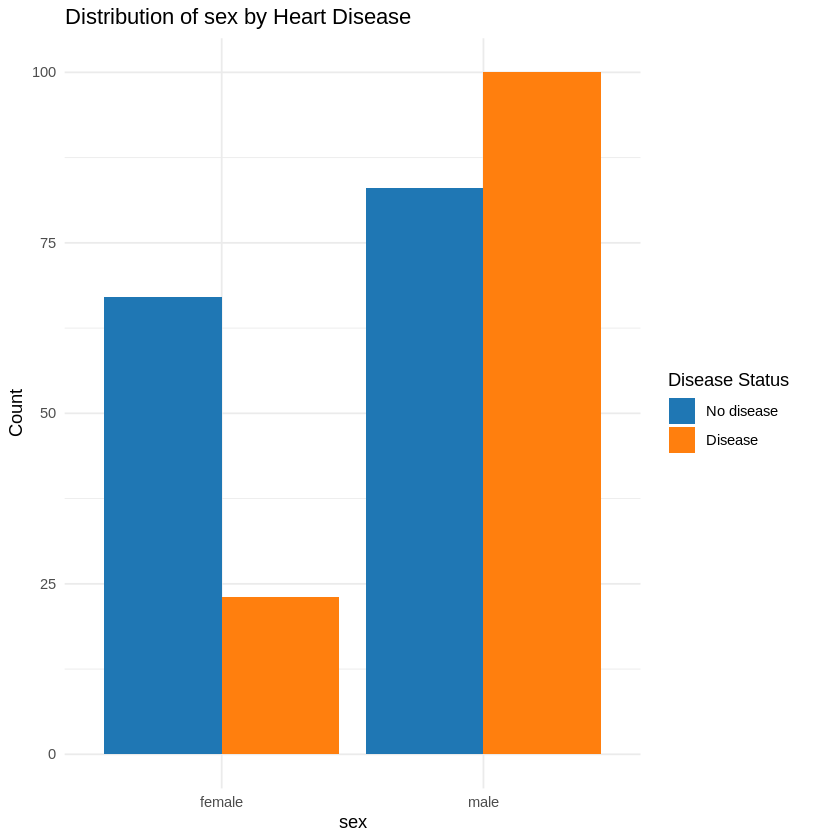

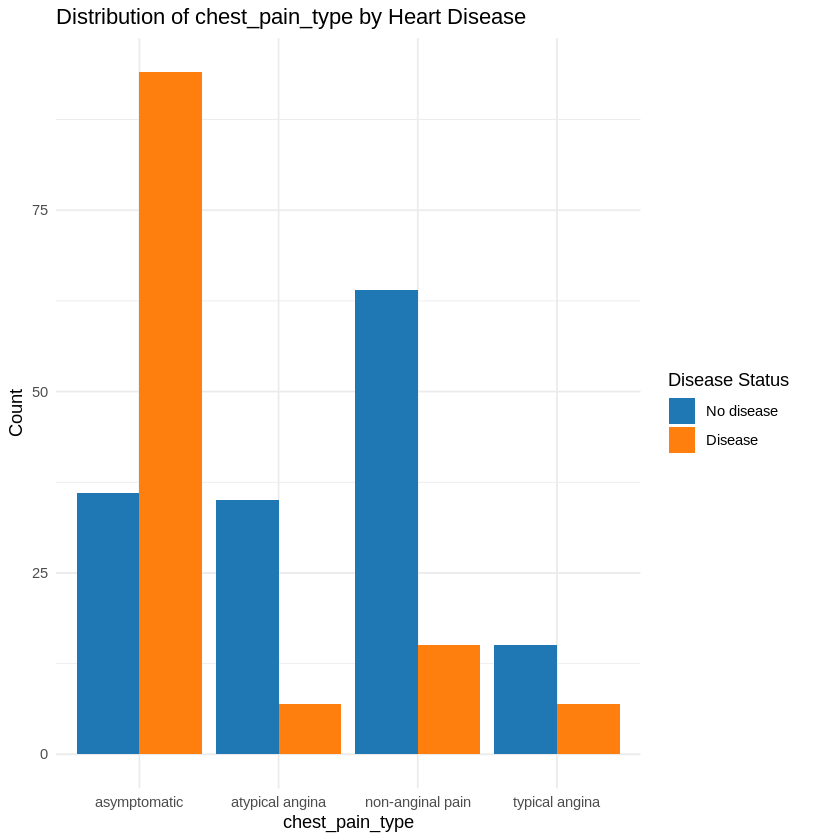

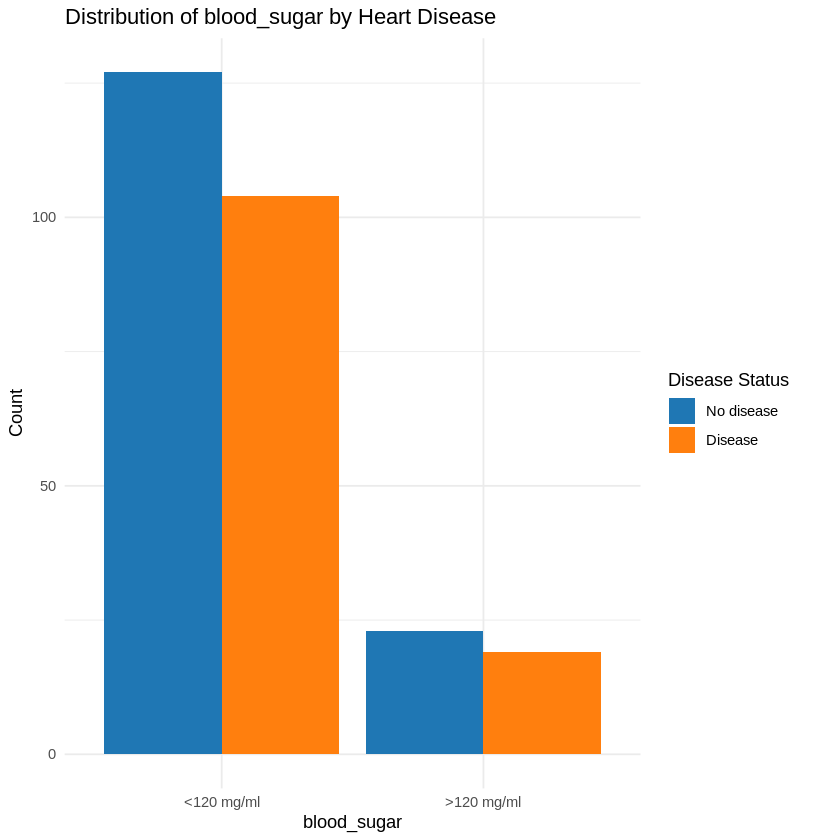

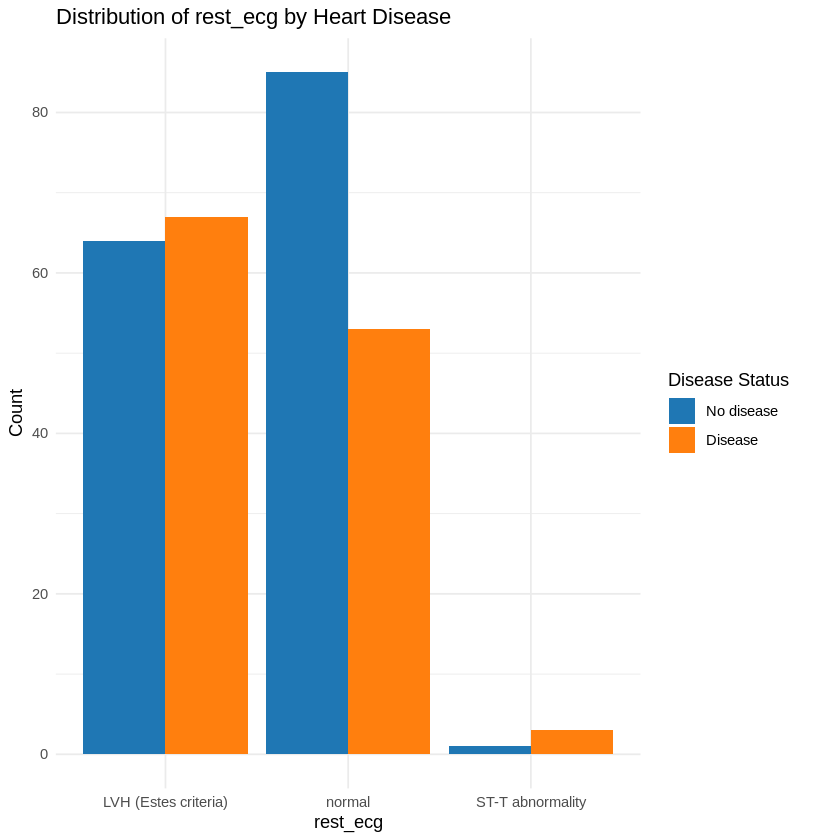

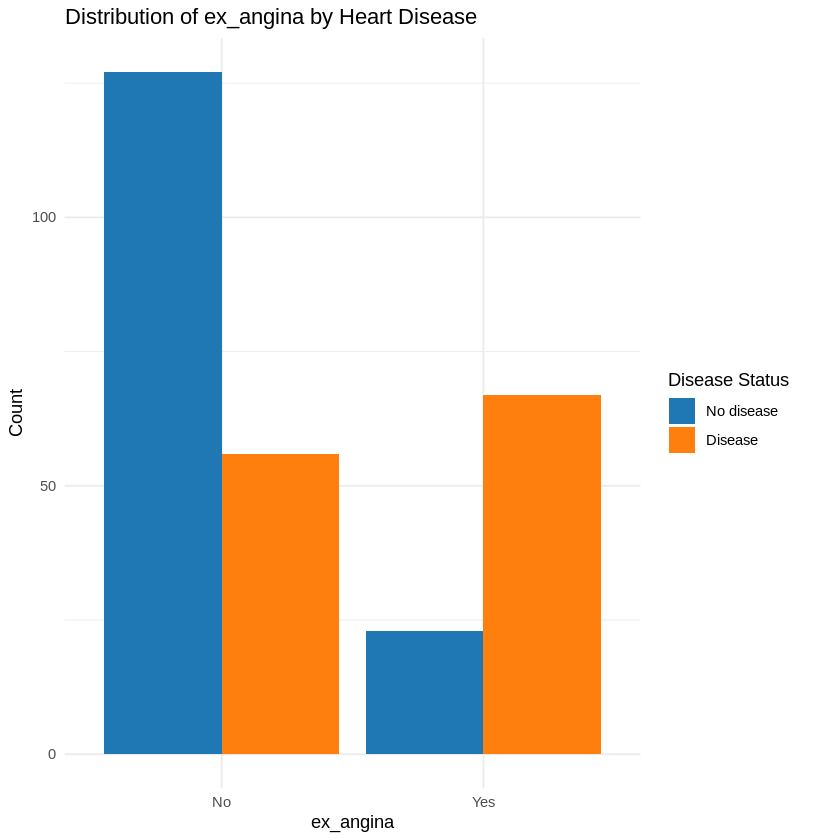

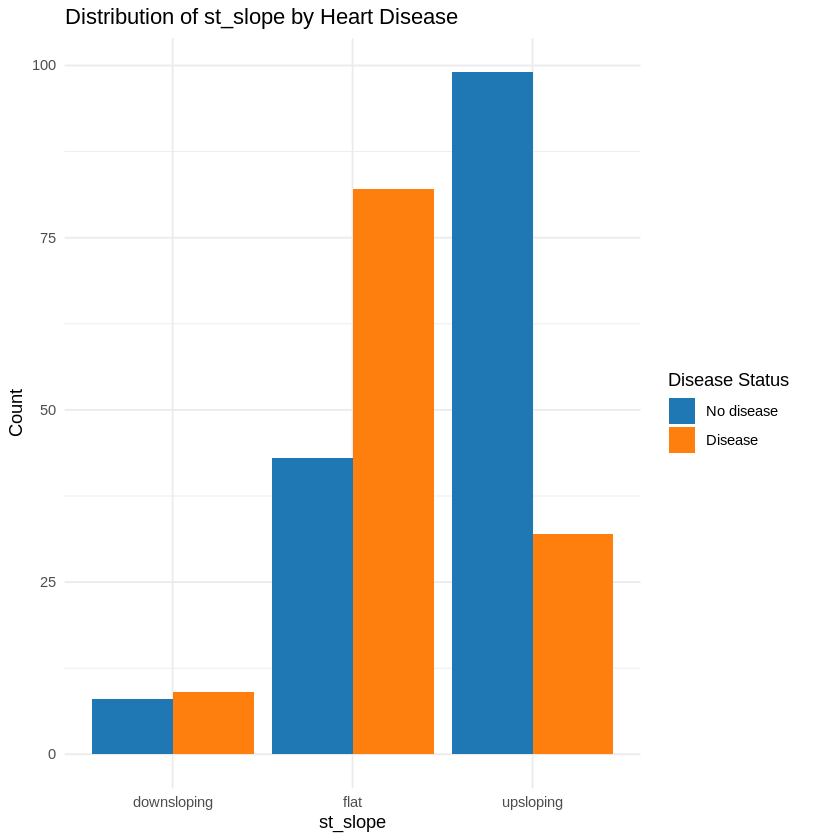

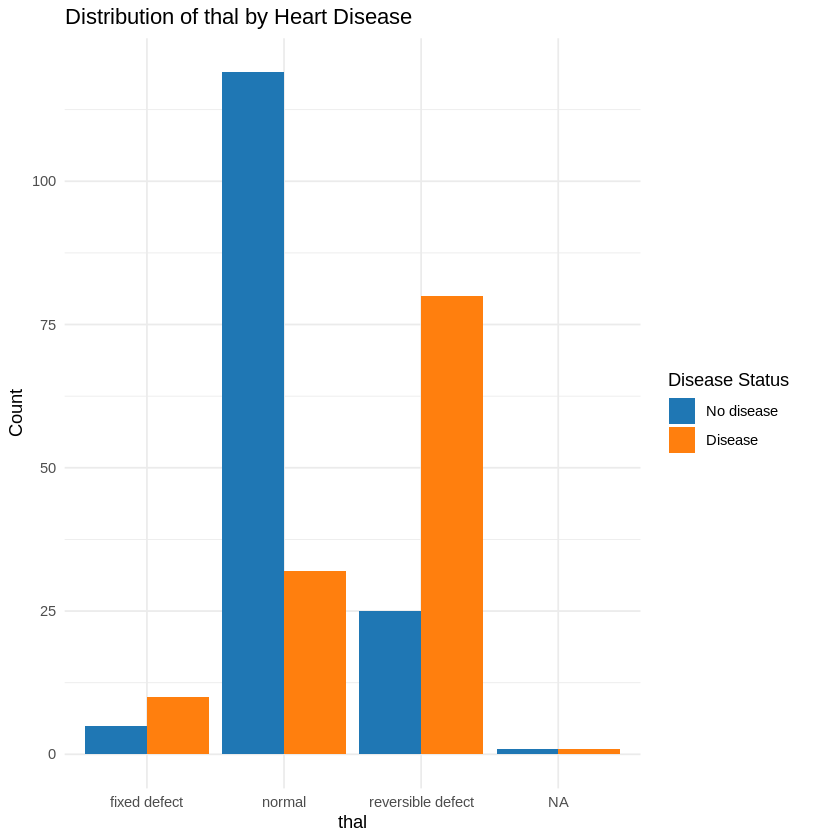

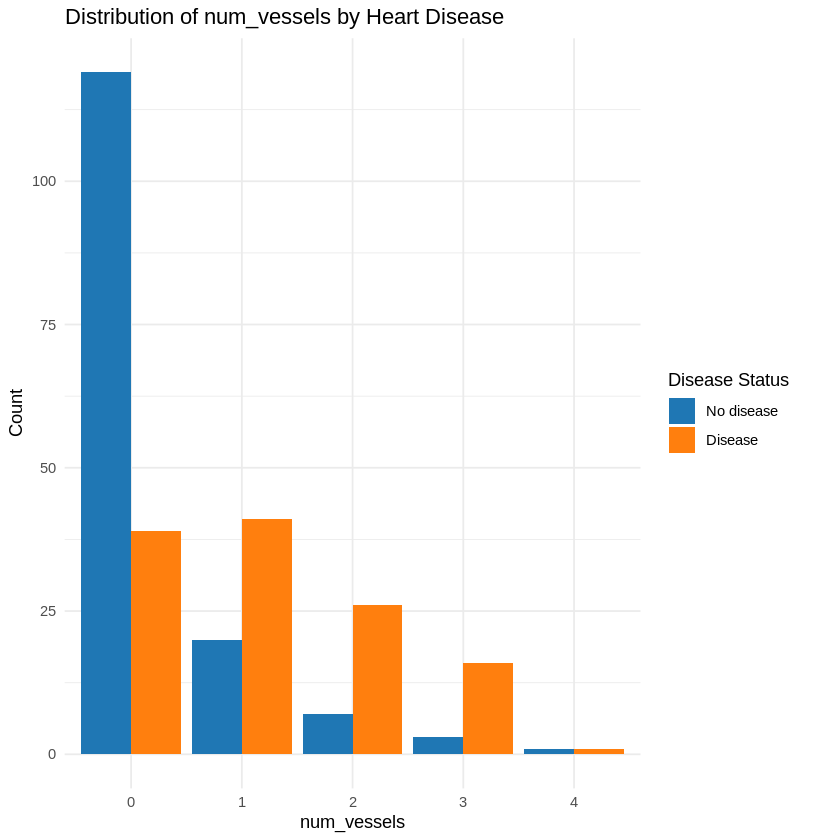

In [ ]:
library(ggplot2)

# List of discrete variables (factors)
discrete_vars <- c("sex", "chest_pain_type", "blood_sugar", "rest_ecg",
                   "ex_angina", "st_slope", "thal", "num_vessels")

# Loop through and plot
for (var in discrete_vars) {
  p <- ggplot(data_train, aes_string(x = var, fill = "disease")) +
    geom_bar(position = "dodge") +
    labs(title = paste("Distribution of", var, "by Heart Disease"),
         x = var, y = "Count") +
    theme_minimal() +
    scale_fill_manual(values = c("#1f77b4", "#ff7f0e"),
                      name = "Disease Status")

  print(p)
}

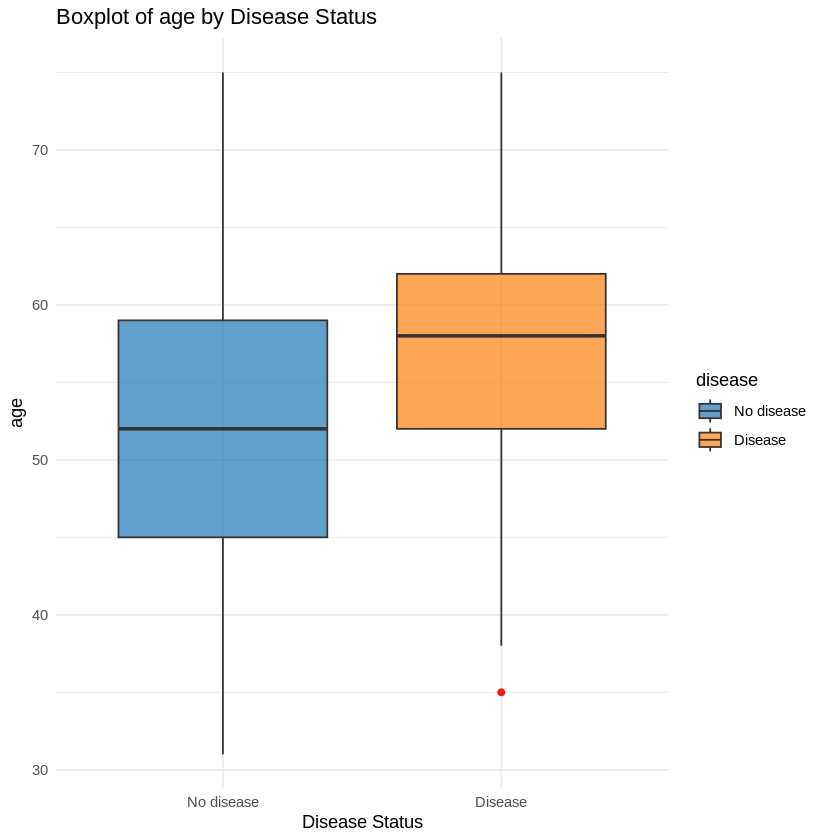

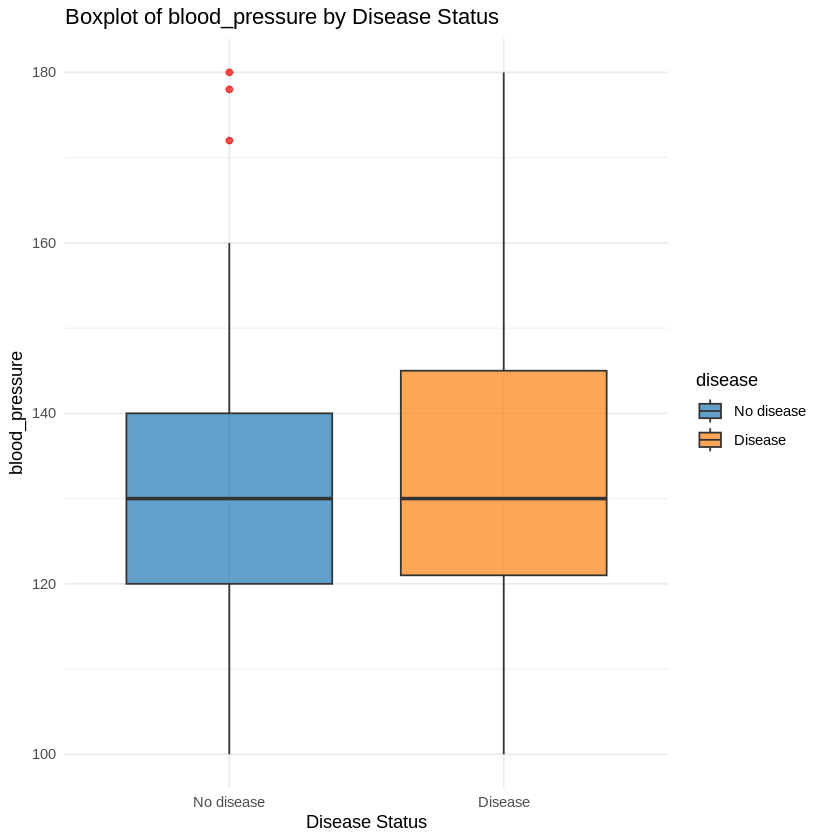

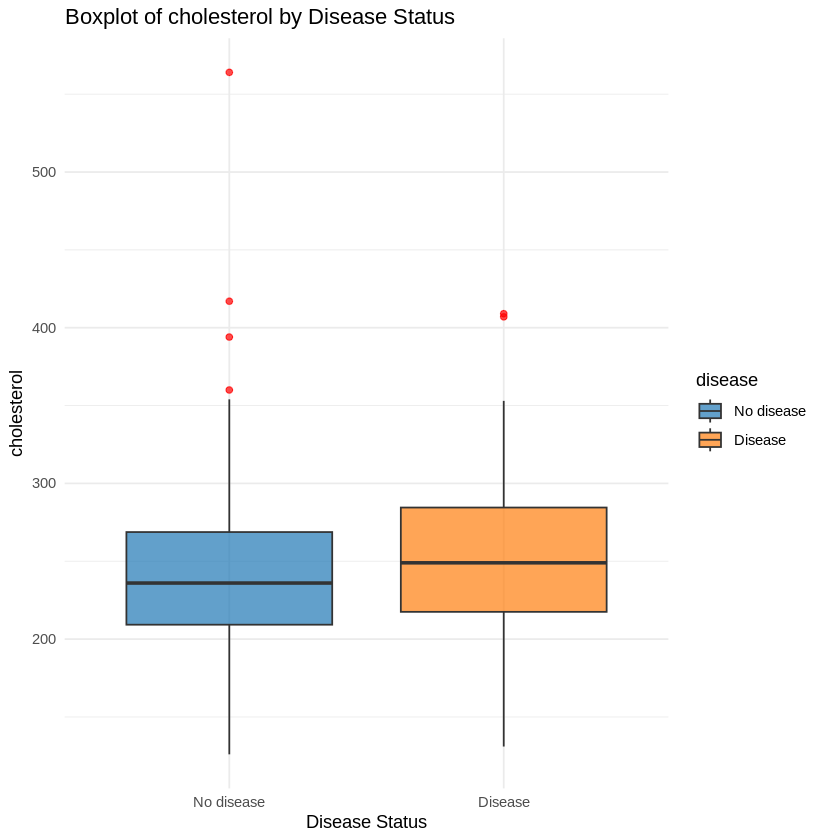

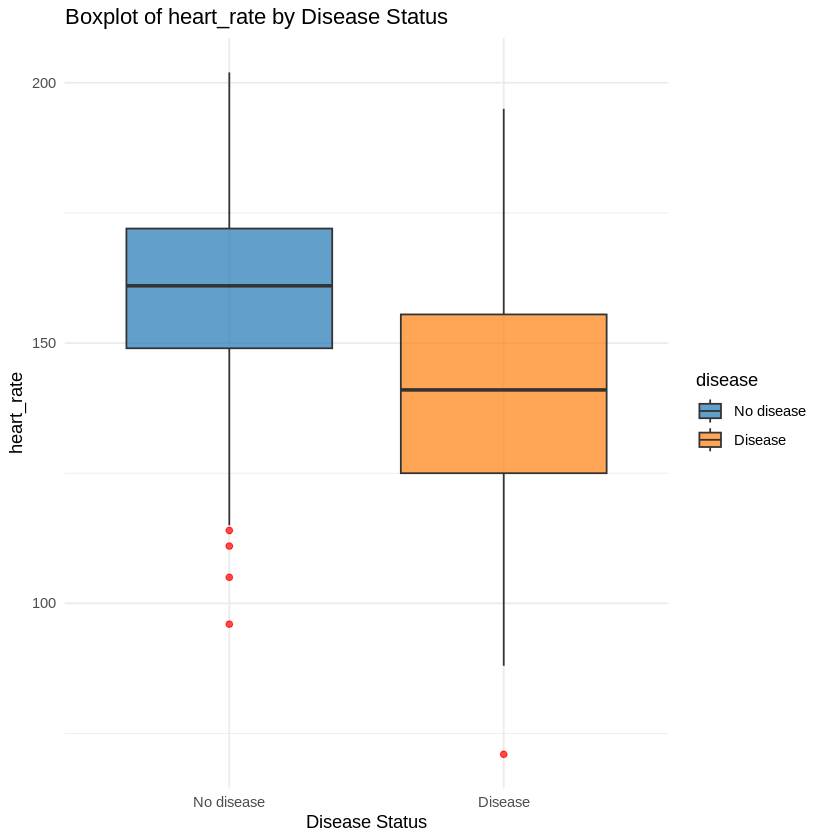

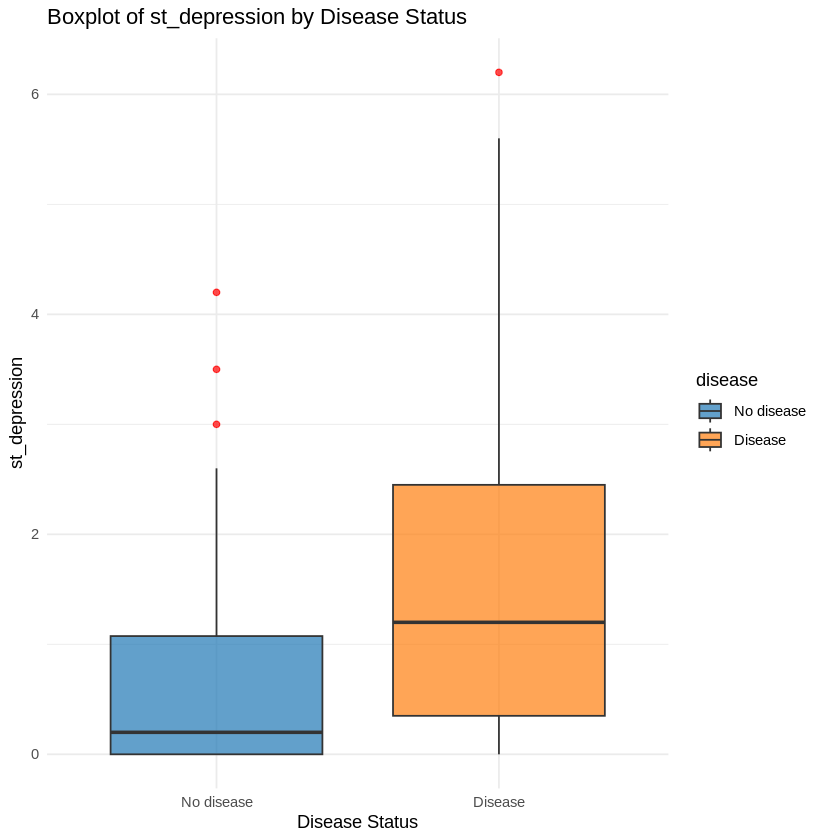

In [ ]:
# Continuous variables
cont_vars <- c("age", "blood_pressure", "cholesterol", "heart_rate", "st_depression")

# Loop through and plot boxplots
for (var in cont_vars) {
  p <- ggplot(data_train, aes_string(x = "disease", y = var, fill = "disease")) +
    geom_boxplot(alpha = 0.7, outlier.color = "red") +
    labs(title = paste("Boxplot of", var, "by Disease Status"),
         x = "Disease Status", y = var) +
    theme_minimal() +
    scale_fill_manual(values = c("#1f77b4", "#ff7f0e"))

  print(p)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ggstats’


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


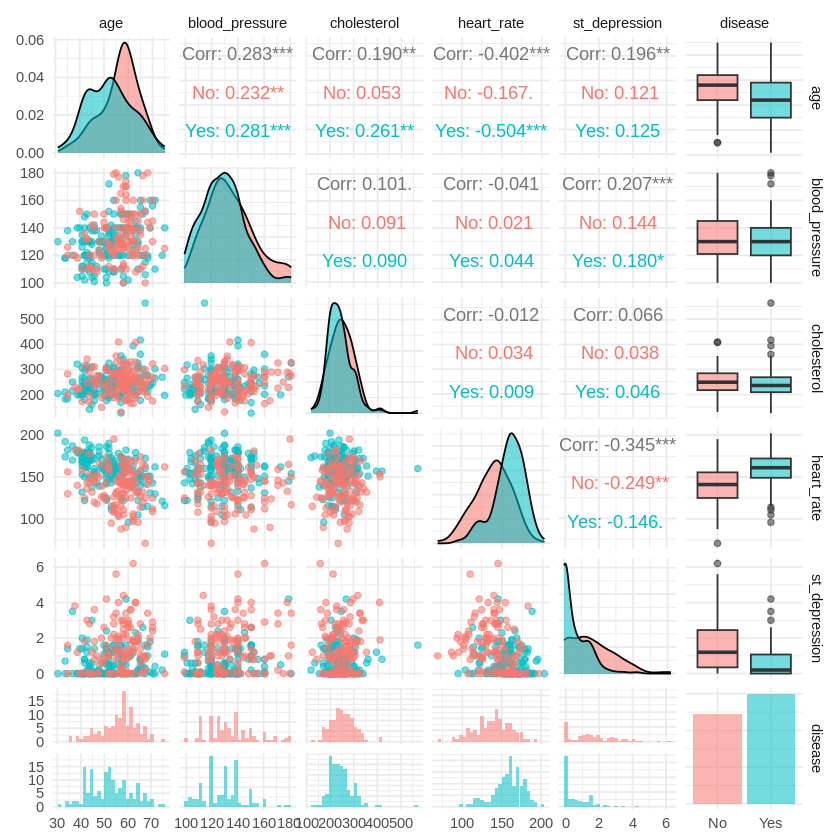

In [ ]:
install.packages("GGally")
library(ggplot2)
library(GGally)

response_col <- "disease"

# Identify continuous variable
cont_vars <- sapply(data_train, is.numeric)
cont_vars <- names(cont_vars[cont_vars])
cont_vars <- setdiff(cont_vars, response_col)

# Pairwise scatterplots
plot_data <- data_train[, c(cont_vars, response_col)]
plot_data[[response_col]] <- factor(plot_data[[response_col]], labels = c("No", "Yes"))

ggpairs(plot_data, aes(color = .data[[response_col]], alpha = 0.5),
        lower = list(continuous = "points"),
        upper = list(continuous = "cor"),
        diag = list(continuous = "densityDiag")) +
  theme_minimal()

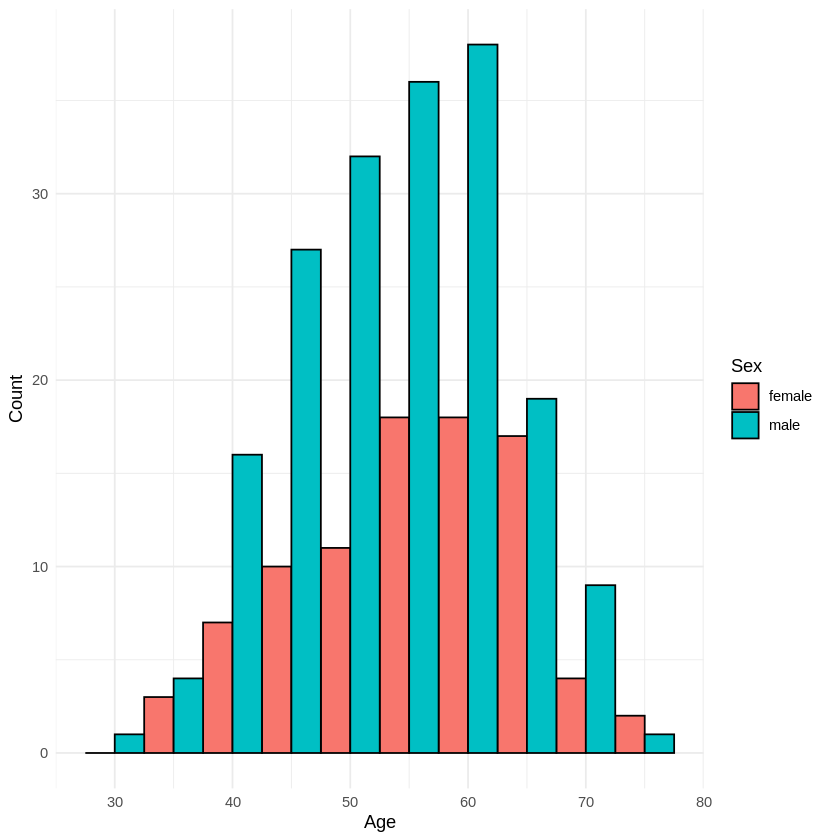

In [ ]:

# ---- Histogram of Age by Sex ----
ggplot(data_train, aes(x = age, fill = sex)) +
  geom_histogram(binwidth = 5, position = "dodge", color = "black") +
  labs(x = "Age", y = "Count", fill = "Sex") +
  theme_minimal()

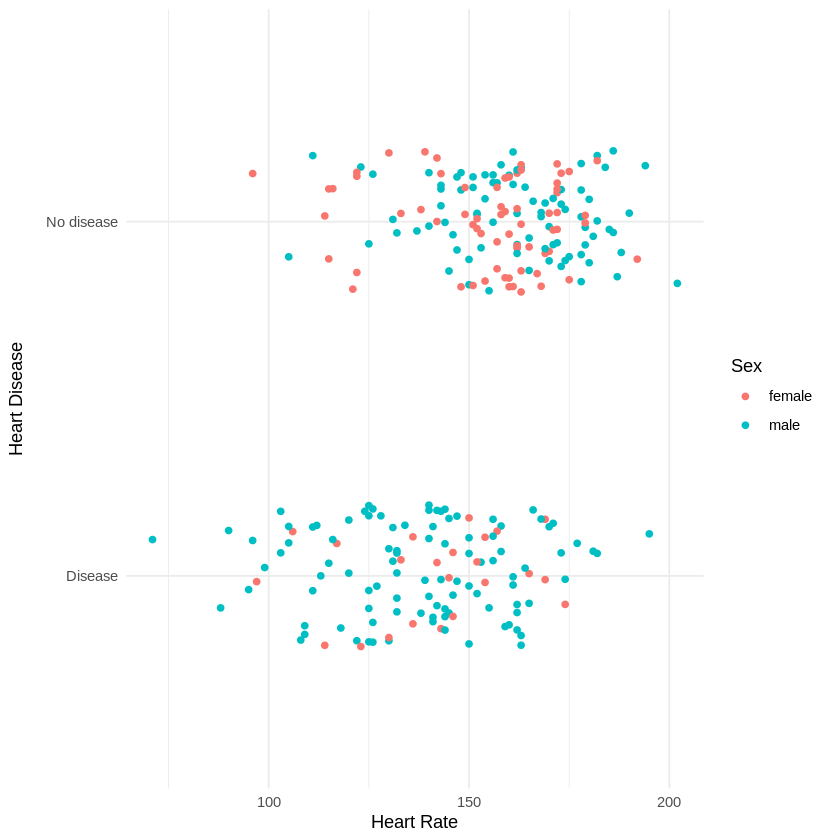

In [ ]:
ggplot(data_train, aes(x = heart_rate, y = disease, color = sex)) +
  geom_jitter(height = 0.2, width = 0) +
  labs(x = "Heart Rate", y = "Heart Disease", color = "Sex") +
  theme_minimal()

## 02 - Logistic regression on aggregated tabular data

Use `data_table`.





* Define the response for a binomial logistic model and fit the **null model** (intercept only). What are the **average odds** of heart disease in the sample, and what is the **probability** of heart disease?

* Fit a model where heart disease depends **only on blood pressure**. Is blood pressure statistically significant at the 0.05 level? If yes, by how many times are the **odds** of heart disease higher for patients with blood pressure **140–180** compared to those with **100–120**?

* Fit a model where heart disease depends **only on age**. Is age statistically significant at the 0.01 level? If yes, by how many times are the **odds** of heart disease higher for patients aged **60–75** compared to those aged **45–60**?

* Assume the odds of heart disease increase **exponentially** with blood pressure and **exponentially** with age. Create corresponding **numeric continuous predictors** as the midpoints of the blood-pressure and age intervals. Fit a model where the odds depend on these numeric values **without interaction**. What is the **odds ratio** for two patients who differ by **10 years of age** but have the same blood pressure?

* Test the previous model **against the saturated model**. Does this test make sense here? Add a short comment on the result.


In [ ]:
data_table

age,blood_pressure,n,disease_yes,disease_no
<fct>,<fct>,<int>,<int>,<int>
30-45,100-120,26,7,19
30-45,121-130,11,1,10
30-45,131-140,9,3,6
30-45,140-180,3,1,2
45-60,100-120,44,15,29
45-60,121-130,42,22,20
45-60,131-140,35,14,21
45-60,140-180,33,21,12
60-75,100-120,18,9,9


In [ ]:
AN = cbind(data_table$disease_yes, data_table$disease_no)

In [ ]:
AN

7,19
1,10
3,6
1,2
15,29
22,20
14,21
21,12
9,9
8,5
8,7


In [ ]:
modlogit <- glm(AN~1, family = binomial(link = "logit"), data_table)
summary(modlogit)



Call:
glm(formula = AN ~ 1, family = binomial(link = "logit"), data = data_table)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.1985     0.1216  -1.631    0.103

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.944  on 11  degrees of freedom
Residual deviance: 22.944  on 11  degrees of freedom
AIC: 63.959

Number of Fisher Scoring iterations: 3


Average odds of heart disease:

In [ ]:
exp(coef(modlogit))

(Intercept) 
       0.82

 Probability of heart disease:

In [ ]:
exp(coef(modlogit))/(1 + exp(coef(modlogit)))

(Intercept) 
  0.4505495

Model where heart disease depends only on blood pressure

In [ ]:
model_bp = glm(AN ~ blood_pressure, family = binomial(link = "logit"), data_table)
summary(model_bp)


Call:
glm(formula = AN ~ blood_pressure, family = binomial(link = "logit"), 
    data = data_table)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)   
(Intercept)            -0.6091     0.2232  -2.729  0.00635 **
blood_pressure121-130   0.4877     0.3326   1.466  0.14257   
blood_pressure131-140   0.3016     0.3453   0.873  0.38242   
blood_pressure140-180   1.0145     0.3453   2.938  0.00330 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.944  on 11  degrees of freedom
Residual deviance: 13.784  on  8  degrees of freedom
AIC: 60.799

Number of Fisher Scoring iterations: 4


Only coeffitients for blood_pressure140-180 are under significance level.

In [ ]:
exp(coef(model_bp)["blood_pressure140-180"])

blood_pressure140-180 
             2.758065

People with that blood pressure have aprox. 2,76 times more chance to get a heart desease.

Model where heart disease depends only on age

In [ ]:
model_age = glm(AN ~ age, family = binomial(link = "logit"), data_table)
summary(model_age)


Call:
glm(formula = AN ~ age, family = binomial(link = "logit"), data = data_table)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.1260     0.3322  -3.390 0.000700 ***
age45-60      0.9960     0.3694   2.696 0.007012 ** 
age60-75      1.3556     0.4102   3.305 0.000951 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.944  on 11  degrees of freedom
Residual deviance: 10.677  on  9  degrees of freedom
AIC: 55.692

Number of Fisher Scoring iterations: 4


All variables are statistically significant at the level 0,01.

Refference value is 30-45, we need it to be 45-60:

In [ ]:
model_age_reff30_45 = glm(AN ~ relevel(factor(age), ref = "45-60"), family = binomial(link = "logit"), data_table)
summary(model_age_reff30_45)


Call:
glm(formula = AN ~ relevel(factor(age), ref = "45-60"), family = binomial(link = "logit"), 
    data = data_table)

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                               -0.1301     0.1615  -0.805  0.42067
relevel(factor(age), ref = "45-60")30-45  -0.9960     0.3694  -2.696  0.00701
relevel(factor(age), ref = "45-60")60-75   0.3596     0.2898   1.241  0.21462
                                           
(Intercept)                                
relevel(factor(age), ref = "45-60")30-45 **
relevel(factor(age), ref = "45-60")60-75   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.944  on 11  degrees of freedom
Residual deviance: 10.677  on  9  degrees of freedom
AIC: 55.692

Number of Fisher Scoring iterations: 4


In [ ]:
exp(0.3596)

[1] 1.432756

People of age 60-75 have 1.43x higher risk to get a heart disease.

In [ ]:
data_table_num <- data_table %>%
  mutate(
    age_mid = case_when(
      age == "30-45" ~ 37.5,
      age == "45-60" ~ 52.5,
      age == "60-75" ~ 67.5
    ),
    bp_mid = case_when(
      blood_pressure == "100-120" ~ 110,
      blood_pressure == "121-130" ~ 125.5,
      blood_pressure == "131-140" ~ 135.5,
      blood_pressure == "140-180" ~ 160
    )
  )

In [ ]:
num_model <- glm(
  cbind(disease_yes, disease_no) ~ age_mid + bp_mid,
  data = data_table_num,
  family = binomial
)

summary(num_model)


Call:
glm(formula = cbind(disease_yes, disease_no) ~ age_mid + bp_mid, 
    family = binomial, data = data_table_num)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.03908    1.05421  -3.831 0.000127 ***
age_mid      0.03548    0.01337   2.654 0.007953 ** 
bp_mid       0.01479    0.00698   2.119 0.034112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.9445  on 11  degrees of freedom
Residual deviance:  7.6448  on  9  degrees of freedom
AIC: 52.659

Number of Fisher Scoring iterations: 4


In [ ]:
beta_age <- coef(num_model)["age_mid"]
odds_ratio_10yr <- exp(beta_age * 10)
odds_ratio_10yr

age_mid 
1.425836

## 03 - Poisson regression on aggregated tabular data

Use `data_table`.


* Reshape the table into the required format and fit a **purely additive log-linear model** for the **group counts**, assuming **mutual independence** among the three grouping predictors (**age**, **blood pressure**, **disease**).

* From that model, what is the estimated **odds** of heart disease among all selected patients, and what is the estimated **probability** of heart disease?

* Fit a model that includes **all pairwise interactions** among the classification variables and compare it to the previous **no-interaction** model. Is the interaction model **significantly better**?

* Using the interaction model, what is the estimated **odds ratio** for heart disease for patients aged **60–75** compared to those aged **45–60**?

* Fit the **saturated model** and print the **parameter estimates**. Is this model significantly better than the model with pairwise interactions?

* Based on the saturated model, is the relationship between **blood pressure** and **heart disease** the **same across all age groups**, or does it differ?

* In which **age category** is the **largest difference** in heart disease between people with **blood pressure < 120** and those with **blood pressure > 140**?


In [ ]:
data_ll <- data_table %>%
  select(age, blood_pressure, disease_yes, disease_no) %>%
  pivot_longer(
    cols = c(disease_yes, disease_no),
    names_to = "disease",
    values_to = "count"
  ) %>%
  mutate(
    disease = ifelse(disease == "disease_yes", "Yes", "No")
  )

In [ ]:
data_ll

age,blood_pressure,disease,count
<fct>,<fct>,<chr>,<int>
30-45,100-120,Yes,7
30-45,100-120,No,19
30-45,121-130,Yes,1
30-45,121-130,No,10
30-45,131-140,Yes,3
30-45,131-140,No,6
30-45,140-180,Yes,1
30-45,140-180,No,2
45-60,100-120,Yes,15


In [ ]:
loglin_model <- glm(
  count ~ age + blood_pressure + disease,
  data = data_ll,
  family = poisson
)

summary(loglin_model)


Call:
glm(formula = count ~ age + blood_pressure + disease, family = poisson, 
    data = data_ll)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)             2.1608     0.1764  12.251  < 2e-16 ***
age45-60                1.1451     0.1640   6.982 2.91e-12 ***
age60-75                0.3567     0.1863   1.915   0.0555 .  
blood_pressure121-130  -0.2877     0.1628  -1.767   0.0773 .  
blood_pressure131-140  -0.3998     0.1683  -2.376   0.0175 *  
blood_pressure140-180  -0.3830     0.1674  -2.288   0.0222 *  
diseaseYes             -0.1985     0.1216  -1.631   0.1028    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 119.070  on 23  degrees of freedom
Residual deviance:  44.094  on 17  degrees of freedom
AIC: 154.18

Number of Fisher Scoring iterations: 5


 Odds of heart disease among all selected patients are:

In [ ]:
exp(-0.1985)

[1] 0.8199598

Probability of heart disease is

In [ ]:
exp(-0.1985)/(1+exp(-0.1985))*100

[1] 45.05373

In [ ]:
loglin_model_interactions <- glm(
  count ~ (age + blood_pressure + disease)^2,
  data = data_ll,
  family = poisson
)

summary(loglin_model_interactions)



Call:
glm(formula = count ~ (age + blood_pressure + disease)^2, family = poisson, 
    data = data_ll)

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        3.0192     0.2108  14.322  < 2e-16 ***
age45-60                           0.2718     0.2693   1.009 0.312889    
age60-75                          -0.7519     0.3411  -2.204 0.027509 *  
blood_pressure121-130             -0.9605     0.3713  -2.587 0.009681 ** 
blood_pressure131-140             -1.1023     0.3956  -2.786 0.005333 ** 
blood_pressure140-180             -2.3837     0.6235  -3.823 0.000132 ***
diseaseYes                        -1.3101     0.3640  -3.599 0.000320 ***
age45-60:blood_pressure121-130     0.7373     0.4250   1.735 0.082779 .  
age60-75:blood_pressure121-130     0.4279     0.5206   0.822 0.411074    
age45-60:blood_pressure131-140     0.7988     0.4529   1.764 0.077755 .  
age60-75:blood_pressure131-140     0.8317     0.5293   1.571 0.1161

In [ ]:
anova(loglin_model, loglin_model_interactions, test = "Chisq")


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,44.093881,NA,NA,NA
2,6,5.425143,11,38.66874,6.029569e-05


We reject null hypothesis, there must be at least one nonzero interaction coeffitient.

In [ ]:
pred_data <- expand.grid(
  age = c("45-60", "60-75"),
  blood_pressure = "121-130",
  disease = c("Yes", "No")
)
pred_data

age,blood_pressure,disease
<fct>,<fct>,<fct>
45-60,121-130,Yes
60-75,121-130,Yes
45-60,121-130,No
60-75,121-130,No


In [ ]:
pred_data$fit <- predict(loglin_model_interactions, newdata = pred_data, type = "response")

# reshape to wide format
pred_wide <- pred_data %>%
  pivot_wider(names_from = disease, values_from = fit)

odds_ratio <- (pred_wide$Yes[pred_wide$age=="60-75"] / pred_wide$No[pred_wide$age=="60-75"]) /
              (pred_wide$Yes[pred_wide$age=="45-60"] / pred_wide$No[pred_wide$age=="45-60"])
odds_ratio


[1] 1.356073

Odds of heart disease for patients aged 60–75 is 1.37 higher than cthose aged 45–60.

In [ ]:
loglin_model_saturated <- glm(
  count ~ age * blood_pressure * disease,
  data = data_ll,
  family = poisson
)

summary(loglin_model_saturated)



Call:
glm(formula = count ~ age * blood_pressure * disease, family = poisson, 
    data = data_ll)

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                                2.94444    0.22942  12.835  < 2e-16
age45-60                                   0.42286    0.29515   1.433  0.15195
age60-75                                  -0.74721    0.40465  -1.847  0.06481
blood_pressure121-130                     -0.64185    0.39068  -1.643  0.10040
blood_pressure131-140                     -1.15268    0.46829  -2.461  0.01384
blood_pressure140-180                     -2.25129    0.74339  -3.028  0.00246
diseaseYes                                -0.99853    0.44214  -2.258  0.02392
age45-60:blood_pressure121-130             0.27029    0.48694   0.555  0.57884
age60-75:blood_pressure121-130             0.05407    0.68099   0.079  0.93672
age45-60:blood_pressure131-140             0.82991    0.54900   1.512  0.13062
age60-75:blood_p

In [ ]:
anova(loglin_model_interactions, loglin_model_saturated, test = "Chisq")


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,5.425143e+00,NA,NA,NA
2,0,-1.554317e-15,6,5.425143,0.49055


Saturated model is not significantly better than the model with pair-wise interactions.

Because of the p=0.49 the 3-way interaction is not significant so blood pressure:disease:age is not.

In [ ]:
library(dplyr)
library(tidyr)

# Start with aggregated table (already created earlier)
# data_table should contain: age, blood_pressure, disease_yes, disease_no

# Reshape to long format (if not already)
data_ll <- data_table %>%
  select(age, blood_pressure, disease_yes, disease_no) %>%
  pivot_longer(
    cols = c(disease_yes, disease_no),
    names_to = "disease",
    values_to = "count"
  ) %>%
  mutate(
    disease = ifelse(disease == "disease_yes", "Yes", "No")
  )

# Pivot wider so Yes/No become separate columns
data_wide <- data_ll %>%
  pivot_wider(
    names_from = disease,
    values_from = count
  ) %>%
  mutate(
    odds = Yes / No   # odds of heart disease
  )

OR_by_age <- data_wide %>%
  group_by(age) %>%
  summarise(
    OR_high_vs_lowBP = odds[blood_pressure == "140-180"] /
                       odds[blood_pressure == "100-120"]
  )

# Print results
OR_by_age


age,OR_high_vs_lowBP
<fct>,<dbl>
30-45,1.357143
45-60,3.383333
60-75,1.400000


The largest difference in heart disease between people with blood pressure less than 120 and greater than 140 is in the 45–60 age group.

## 04 - Logistic regression - statistical approach

Use `data_train`.

* Print a **contingency table** for `sex` and `disease`. From that table, **by hand**, compute the **empirical odds ratio** for heart disease (men vs. women) and the **probability** of disease for women and for men. Compare these to a **logistic regression** with `sex` as the only predictor and `disease` as the response. For the odds ratio, also report a **95% confidence interval**, and comment on whether women have **significantly lower odds** of heart disease.

* Print a **contingency table** for `chest_pain_type` and `disease`. From that table, **by hand**, compute the **empirical odds ratio** for heart disease comparing **type 0 (asymptomatic)** vs. **all other types**, and compute the **probability** of disease for each type. Compare these to a **logistic regression** with `chest_pain_type` as the only predictor and `disease` as the response. For the odds ratio, also report a **95% confidence interval**, and comment on whether patients with **asymptomatic** chest pain have **significantly lower odds** of heart disease than the other types.

* Fit a model using **all available variables** (both categorical and numeric). Use **deviance tests** to **stepwise reduce** the model. Compare the final model to the model you would get using **automatic stepwise selection** (e.g., `step()`).

* For your selected model, compute the **odds** of heart disease for **men vs. women**, including **95% confidence intervals**. Do the same for **asymptomatic chest pain** vs. **other types**. How did these results change compared to the simple models, and how would you **explain** the change?

* Using your model, compute **predicted probabilities** of heart disease for the **test data** and, for the predictor `blood_pressure`, **plot prediction intervals / confidence bands** for the predictions.

* Based on the **training data**, choose a suitable **threshold** for classifying **disease vs. no disease**. On the **test data**, compute **Accuracy** and draw the **ROC curve**.




In [ ]:
sex_disease_tab <- table(Sex = data_train$sex,
                         Disease = data_train$disease)
sex_disease_tab

        Disease
Sex      No disease Disease
  female         67      23
  male           83     100

Empirical odds ratio for heart disease is 3.5, meaning males have higher odds to develop heart disease in this sample.

In [ ]:
(100/83)/(23/67)

[1] 3.509691

The probability of desease for men is:

In [ ]:
100/183

[1] 0.5464481

and for woman:

In [ ]:
23/90

[1] 0.2555556

In [ ]:
levels(data_train$disease)

levels(data_train$sex)

[1] "No disease" "Disease"

[1] "female" "male"

In [ ]:
logit_model_sex <- glm(disease ~ sex, data = data_train, family = binomial(link = logit))
summary(logit_model_sex)



Call:
glm(formula = disease ~ sex, family = binomial(link = logit), 
    data = data_train)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0692     0.2417  -4.424 9.68e-06 ***
sexmale       1.2555     0.2836   4.426 9.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 375.78  on 272  degrees of freedom
Residual deviance: 354.41  on 271  degrees of freedom
AIC: 358.41

Number of Fisher Scoring iterations: 4


Odds ratio:

In [ ]:
exp(coef(logit_model_sex)[2])

sexmale 
3.509691

which corresponds to empirical calculations

Odds 95% confidence interval:

In [ ]:
confint_logit_sex <- exp(confint(logit_model_sex)["sexmale", ])
confint_logit_sex

Waiting for profiling to be done...



2.5 %   97.5 % 
2.037231 6.215107

so women have significantly lower odds of heart disease compared to men

Print a contingency table for chest_pain_type and disease. From that table, by hand, compute the empirical odds ratio for heart disease comparing type 0 (asymptomatic) vs. all other types, and compute the probability of disease for each type. Compare these to a logistic regression with chest_pain_type as the only predictor and disease as the response. For the odds ratio, also report a 95% confidence interval, and comment on whether patients with asymptomatic chest pain have significantly lower odds of heart disease than the other types.

Contingency table for chest_pain_type and disease

In [ ]:
chest_disease_tab <- table(Chest_Pain_Type = data_train$chest_pain_type,
                           Disease_Status = data_train$disease)
chest_disease_tab

                  Disease_Status
Chest_Pain_Type    No disease Disease
  asymptomatic             36      94
  atypical angina          35       7
  non-anginal pain         64      15
  typical angina           15       7

Odds ratio - asymptomatic Disease/ No desease vs atypical angina  Disease/ No desease

In [ ]:
(7/35)/(94/36)

[1] 0.07659574

Odds ratio - asymptomatic Disease/ No desease vs  non-anginal pain Disease/ No desease

In [ ]:
(15/64)/(94/36)

[1] 0.08976064

Odds ratio - asymptomatic Disease/ No desease vs typical angina Disease / No desease

In [ ]:
(7/15)/(94/36)

[1] 0.1787234

The probabilities of disease for each type:

asymptomatic:

In [ ]:
94/(36+94)

[1] 0.7230769

atypical angina:

In [ ]:
7/(7+35)

[1] 0.1666667

non-anginal pain:

In [ ]:
15/(15+64)

[1] 0.1898734

typical angina:

In [ ]:
7/(15+7)

[1] 0.3181818

In [ ]:
logit_cp <- glm(disease ~ chest_pain_type, data = data_train, family = binomial)

summary(logit_cp)


Call:
glm(formula = disease ~ chest_pain_type, family = binomial, data = data_train)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       0.9598     0.1960   4.897 9.74e-07 ***
chest_pain_typeatypical angina   -2.5692     0.4581  -5.609 2.04e-08 ***
chest_pain_typenon-anginal pain  -2.4106     0.3474  -6.938 3.97e-12 ***
chest_pain_typetypical angina    -1.7219     0.4979  -3.458 0.000544 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 375.78  on 272  degrees of freedom
Residual deviance: 295.57  on 269  degrees of freedom
AIC: 303.57

Number of Fisher Scoring iterations: 4


In [ ]:
levels(data_train$chest_pain_type)


[1] "asymptomatic"     "atypical angina"  "non-anginal pain" "typical angina"

In [ ]:
exp(coef(logit_cp)[2])
exp(coef(logit_cp)[3])
exp(coef(logit_cp)[4])

chest_pain_typeatypical angina 
                    0.07659574

chest_pain_typenon-anginal pain 
                     0.08976064

chest_pain_typetypical angina 
                    0.1787234

The empirical calculations correspond to logistic regression.

In [ ]:
OR <- exp(coef(logit_cp))
CI <- exp(confint(logit_cp))

# Combine results in a nice table
round(data.frame(OR, CI_lower = CI[,1], CI_upper = CI[,2]), 3)

Waiting for profiling to be done...



,OR,CI_lower,CI_upper
,<dbl>,<dbl>,<dbl>
(Intercept),2.611,1.796,3.881
chest_pain_typeatypical angina,0.077,0.029,0.178
chest_pain_typenon-anginal pain,0.090,0.044,0.173
chest_pain_typetypical angina,0.179,0.064,0.460


Patients with asymptomatic chest pain have much higher chance of heart desease comparing to other types.

Fit a model using all available variables (both categorical and numeric). Use deviance tests to stepwise reduce the model. Compare the final model to the model you would get using automatic stepwise selection (e.g., step()).

In [ ]:
full_model <- glm(disease ~ ., data = data_train, family = binomial)
summary(full_model)


Call:
glm(formula = disease ~ ., family = binomial, data = data_train)

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -2.8294664  3.0874480  -0.916 0.359435    
age                             -0.0252607  0.0268440  -0.941 0.346694    
sexmale                          1.4451710  0.5935948   2.435 0.014908 *  
chest_pain_typeatypical angina  -1.1935662  0.6683112  -1.786 0.074108 .  
chest_pain_typenon-anginal pain -2.2299027  0.5812229  -3.837 0.000125 ***
chest_pain_typetypical angina   -2.2403022  0.7463159  -3.002 0.002684 ** 
blood_pressure                   0.0337120  0.0129244   2.608 0.009097 ** 
cholesterol                      0.0009208  0.0046293   0.199 0.842339    
blood_sugar>120 mg/ml           -0.6861316  0.6499996  -1.056 0.291157    
rest_ecgnormal                  -0.6771103  0.4425625  -1.530 0.126023    
rest_ecgST-T abnormality         0.3561380  2.5630348   0.139 0.889488    
heart_rate   

In [ ]:
drop1(full_model, test = "Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,157.6969,201.6969,NA,NA
age,1,158.5910,200.5910,0.89414056,3.443577e-01
sex,1,164.0039,206.0039,6.30698248,1.202634e-02
chest_pain_type,3,178.1410,216.1410,20.44415427,1.373092e-04
blood_pressure,1,164.9482,206.9482,7.25129649,7.084984e-03
cholesterol,1,157.7361,199.7361,0.03921757,8.430182e-01
blood_sugar,1,158.8397,200.8397,1.14281670,2.850579e-01
rest_ecg,2,160.1869,200.1869,2.49000885,2.879396e-01
heart_rate,1,161.3628,203.3628,3.66589546,5.553679e-02


In [ ]:
reduced_model1 <- update(full_model, . ~ . - cholesterol)
drop1(reduced_model1, test = "Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,157.7361,199.7361,NA,NA
age,1,158.5951,198.5951,0.8589603,3.540298e-01
sex,1,164.2645,204.2645,6.5283672,1.061674e-02
chest_pain_type,3,178.5146,214.5146,20.7784778,1.170373e-04
blood_pressure,1,165.0127,205.0127,7.2766265,6.985761e-03
blood_sugar,1,158.8555,198.8555,1.1194101,2.900455e-01
rest_ecg,2,160.4472,198.4472,2.7110980,2.578057e-01
heart_rate,1,161.3630,201.3630,3.6268410,5.685464e-02
ex_angina,1,159.0888,199.0888,1.3526800,2.448101e-01


In [ ]:
reduced_model2 <- update(reduced_model1, . ~ . - age)
drop1(reduced_model2, test = "Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,158.5951,198.5951,NA,NA
sex,1,165.5375,203.5375,6.942409,8.417568e-03
chest_pain_type,3,180.3986,214.3986,21.803497,7.166946e-05
blood_pressure,1,165.0680,203.0680,6.472968,1.095274e-02
blood_sugar,1,159.7722,197.7722,1.177089,2.779494e-01
rest_ecg,2,161.1403,197.1403,2.545278,2.800915e-01
heart_rate,1,161.4500,199.4500,2.854953,9.109292e-02
ex_angina,1,159.8653,197.8653,1.270233,2.597229e-01
st_depression,1,162.4634,200.4634,3.868339,4.920519e-02


In [ ]:
reduced_model3 <- update(reduced_model2, . ~ . - rest_ecg)
drop1(reduced_model3, test = "Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,161.1403,197.1403,NA,NA
sex,1,168.6052,202.6052,7.464870,6.291457e-03
chest_pain_type,3,183.0173,213.0173,21.876927,6.919265e-05
blood_pressure,1,168.0802,202.0802,6.939875,8.429501e-03
blood_sugar,1,162.2753,196.2753,1.134946,2.867227e-01
heart_rate,1,163.9251,197.9251,2.784763,9.516475e-02
ex_angina,1,162.4144,196.4144,1.274077,2.590033e-01
st_depression,1,164.6390,198.6390,3.498605,6.142054e-02
st_slope,2,169.9303,201.9303,8.789994,1.233892e-02


In [ ]:
reduced_model4 <- update(reduced_model3, . ~ . - blood_sugar)
drop1(reduced_model4, test = "Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,162.2753,196.2753,NA,NA
sex,1,169.4413,201.4413,7.165993,7.429856e-03
chest_pain_type,3,186.4884,214.4884,24.213134,2.254697e-05
blood_pressure,1,168.4333,200.4333,6.157996,1.308193e-02
heart_rate,1,165.0530,197.0530,2.777668,9.558725e-02
ex_angina,1,163.4854,195.4854,1.210096,2.713132e-01
st_depression,1,166.1251,198.1251,3.849793,4.975213e-02
st_slope,2,170.7690,200.7690,8.493683,1.430936e-02
num_vessels,4,196.3647,222.3647,34.089366,7.143935e-07


In [ ]:
reduced_model5 <- update(reduced_model4, . ~ . - ex_angina)
drop1(reduced_model5, test = "Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,163.4854,195.4854,NA,NA
sex,1,170.3436,200.3436,6.858256,8.823262e-03
chest_pain_type,3,194.5767,220.5767,31.091261,8.132559e-07
blood_pressure,1,170.1683,200.1683,6.682911,9.734152e-03
heart_rate,1,167.1230,197.1230,3.637616,5.648776e-02
st_depression,1,167.9037,197.9037,4.418280,3.555586e-02
st_slope,2,172.2546,200.2546,8.769233,1.246767e-02
num_vessels,4,197.2221,221.2221,33.736717,8.438198e-07
thal,2,176.7519,204.7519,13.266541,1.315852e-03


In [ ]:
final_reduced_model <- reduced_model5

heart_rate is border-line but it may be important

In [ ]:
auto_model<- step(full_model, direction = "both")

Start:  AIC=201.7
disease ~ age + sex + chest_pain_type + blood_pressure + cholesterol + 
    blood_sugar + rest_ecg + heart_rate + ex_angina + st_depression + 
    st_slope + num_vessels + thal

                  Df Deviance    AIC
- cholesterol      1   157.74 199.74
- rest_ecg         2   160.19 200.19
- age              1   158.59 200.59
- blood_sugar      1   158.84 200.84
- ex_angina        1   159.06 201.06
<none>                 157.70 201.70
- st_depression    1   160.93 202.93
- heart_rate       1   161.36 203.36
- st_slope         2   165.95 205.95
- sex              1   164.00 206.00
- blood_pressure   1   164.95 206.95
- thal             2   170.72 210.72
- chest_pain_type  3   178.14 216.14
- num_vessels      4   191.60 227.60

Step:  AIC=199.74
disease ~ age + sex + chest_pain_type + blood_pressure + blood_sugar + 
    rest_ecg + heart_rate + ex_angina + st_depression + st_slope + 
    num_vessels + thal

                  Df Deviance    AIC
- rest_ecg         2   160.45

In [ ]:
summary(auto_model)


Call:
glm(formula = disease ~ sex + chest_pain_type + blood_pressure + 
    heart_rate + st_depression + st_slope + num_vessels + thal, 
    family = binomial, data = data_train)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -3.85090    2.45257  -1.570 0.116380    
sexmale                          1.39470    0.55239   2.525 0.011575 *  
chest_pain_typeatypical angina  -1.37055    0.63492  -2.159 0.030880 *  
chest_pain_typenon-anginal pain -2.56462    0.55282  -4.639 3.50e-06 ***
chest_pain_typetypical angina   -2.37992    0.71133  -3.346 0.000821 ***
blood_pressure                   0.02918    0.01164   2.507 0.012170 *  
heart_rate                      -0.02061    0.01119  -1.842 0.065446 .  
st_depression                    0.52862    0.26013   2.032 0.042135 *  
st_slopeflat                     1.60778    1.05668   1.522 0.128125    
st_slopeupsloping                0.32677    1.17780   0.277 0.781444    
nu

In [ ]:
summary(final_reduced_model)


Call:
glm(formula = disease ~ sex + chest_pain_type + blood_pressure + 
    heart_rate + st_depression + st_slope + num_vessels + thal, 
    family = binomial, data = data_train)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -3.85090    2.45257  -1.570 0.116380    
sexmale                          1.39470    0.55239   2.525 0.011575 *  
chest_pain_typeatypical angina  -1.37055    0.63492  -2.159 0.030880 *  
chest_pain_typenon-anginal pain -2.56462    0.55282  -4.639 3.50e-06 ***
chest_pain_typetypical angina   -2.37992    0.71133  -3.346 0.000821 ***
blood_pressure                   0.02918    0.01164   2.507 0.012170 *  
heart_rate                      -0.02061    0.01119  -1.842 0.065446 .  
st_depression                    0.52862    0.26013   2.032 0.042135 *  
st_slopeflat                     1.60778    1.05668   1.522 0.128125    
st_slopeupsloping                0.32677    1.17780   0.277 0.781444    
nu

the resulting models from manual dropping and step() are the same

For your selected model, compute the odds of heart disease for men vs. women, including 95% confidence intervals. Do the same for asymptomatic chest pain vs. other types. How did these results change compared to the simple models, and how would you explain the change?

In [ ]:
OR_table <- exp(cbind(Estimate = coef(final_reduced_model),
                      confint(final_reduced_model)))
OR_table

Waiting for profiling to be done...



,Estimate,2.5 %,97.5 %
(Intercept),0.02126052,0.0001522236,2.3985280
sexmale,4.03377010,1.4106724151,12.5162278
chest_pain_typeatypical angina,0.25396689,0.0669588116,0.8323376
chest_pain_typenon-anginal pain,0.07694868,0.0242530492,0.2154265
chest_pain_typetypical angina,0.09255782,0.0211961733,0.3529138
blood_pressure,1.02960685,1.0069595171,1.0542526
heart_rate,0.97959872,0.9573470751,1.0005544
st_depression,1.69659606,1.0354610569,2.8921166
st_slopeflat,4.99171548,0.6821267618,42.1816209
st_slopeupsloping,1.38647698,0.1512023907,15.0102045


Sexmale is - 4.03377010, man have odds 4x higher than woman to develop heart disease, where with asymptomatic chest pain gives much higher odds of disease than other types for chosen model.


For simplier models we goot for sex:

In [ ]:
exp(coef(logit_model_sex)[2])

confint_logit_sex


sexmale 
3.509691

2.5 %   97.5 % 
2.037231 6.215107

the odds form males are 3.5x bigger than for woman, which is smaller than in multivariable models, maybe because in multivariable model there is more older man than woman, and age may increase the risk of heart disease.

Chest pain:

In [ ]:
round(data.frame(OR, CI_lower = CI[,1], CI_upper = CI[,2]), 3)

,OR,CI_lower,CI_upper
,<dbl>,<dbl>,<dbl>
(Intercept),2.611,1.796,3.881
chest_pain_typeatypical angina,0.077,0.029,0.178
chest_pain_typenon-anginal pain,0.090,0.044,0.173
chest_pain_typetypical angina,0.179,0.064,0.460


test data:

In [ ]:
#(1 = male; 0 = female)

In [ ]:
# Convert categorical variables to factors with labels
data_test$sex <- factor(data_test$sex,
                         levels = c("0", "1")
                         )

data_test$chest_pain_type <- factor(data_test$chest_pain_type,
                                     levels = c(0, 1, 2, 3),
                                     labels = c("asymptomatic",
                                                "atypical angina",
                                                "non-anginal pain",
                                                "typical angina"))

data_test$blood_sugar <- factor(data_test$blood_sugar,
                                 levels = c(0, 1),
                                 labels = c("<120 mg/ml", ">120 mg/ml"))

data_test$rest_ecg <- factor(data_test$rest_ecg,
                              levels = c(0, 1, 2),
                              labels = c("LVH (Estes criteria)",
                                         "normal",
                                         "ST-T abnormality"))

data_test$ex_angina <- factor(data_test$ex_angina,
                               levels = c(0, 1),
                               labels = c("No", "Yes"))

data_test$st_slope <- factor(data_test$st_slope,
                              levels = c(0, 1, 2),
                              labels = c("downsloping",
                                         "flat",
                                         "upsloping"))

data_test$thal <- factor(data_test$thal,
                          levels = c(1, 2, 3),
                          labels = c("fixed defect",
                                     "normal",
                                     "reversible defect"))

data_test$num_vessels <- factor(data_test$num_vessels,
                                 levels = c(0, 1, 2, 3, 4),
                                 labels = c("0", "1", "2", "3", "4"))

data_test$disease <- factor(data_test$disease,
                             levels = c(0, 1),
                             labels = c("No disease", "Disease"))

# Check the result
str(data_test)
head(data_test)


'data.frame':	30 obs. of  14 variables:
 $ age            : int  66 71 64 66 39 58 47 35 58 56 ...
 $ sex            : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 2 2 2 ...
 $ chest_pain_type: Factor w/ 4 levels "asymptomatic",..: 1 1 4 3 3 1 3 2 2 2 ...
 $ blood_pressure : int  160 112 170 146 138 130 130 122 125 130 ...
 $ cholesterol    : int  228 149 227 278 220 197 253 192 220 221 ...
 $ blood_sugar    : Factor w/ 2 levels "<120 mg/ml",">120 mg/ml": 1 1 1 1 1 1 1 1 1 1 ...
 $ rest_ecg       : Factor w/ 3 levels "LVH (Estes criteria)",..: 1 2 1 1 2 2 2 2 2 1 ...
 $ heart_rate     : int  138 125 155 152 152 131 179 174 144 163 ...
 $ ex_angina      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ st_depression  : num  2.3 1.6 0.6 0 0 0.6 0 0 0.4 0 ...
 $ st_slope       : Factor w/ 3 levels "downsloping",..: 3 2 2 2 2 2 3 3 2 3 ...
 $ num_vessels    : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 2 1 1 1 1 5 1 ...
 $ thal           : Factor w/ 3 levels "fixed defect",..: 1 2 

,age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,ex_angina,st_depression,st_slope,num_vessels,thal,disease
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,66,1,asymptomatic,160,228,<120 mg/ml,LVH (Estes criteria),138,No,2.3,upsloping,0,fixed defect,No disease
2,71,0,asymptomatic,112,149,<120 mg/ml,normal,125,No,1.6,flat,0,normal,No disease
3,64,1,typical angina,170,227,<120 mg/ml,LVH (Estes criteria),155,No,0.6,flat,0,reversible defect,No disease
4,66,0,non-anginal pain,146,278,<120 mg/ml,LVH (Estes criteria),152,No,0.0,flat,1,normal,No disease
5,39,0,non-anginal pain,138,220,<120 mg/ml,normal,152,No,0.0,flat,0,normal,No disease
6,58,0,asymptomatic,130,197,<120 mg/ml,normal,131,No,0.6,flat,0,normal,No disease


Using your model, compute predicted probabilities of heart disease for the test data and, for the predictor blood_pressure, plot prediction intervals / confidence bands for the predictions.

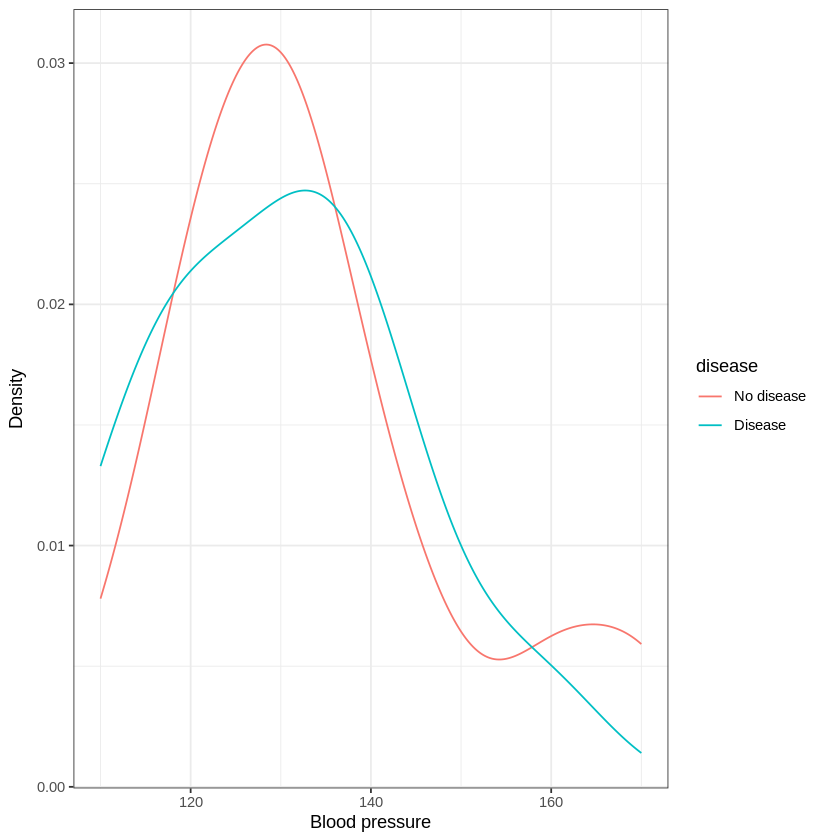

In [ ]:
library("ggplot2")
theme_set(theme_bw())

xlab <- "Blood pressure"
ggplot(data_test, aes(x = blood_pressure, colour = disease)) +
    geom_line(stat = "density") + labs(x = xlab, y = "Density")

In [ ]:
str(data_test$sex)
table(data_test$sex)

 Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 2 2 2 ...



 0  1 
 6 24 

In [ ]:
# Convert numeric to character manually
data_test$sex <- as.character(data_test$sex)

# Map 0 → "female", 1 → "male"
data_test$sex[data_test$sex == "0"] <- "female"
data_test$sex[data_test$sex == "1"] <- "male"

# Convert to factor with levels matching training data
data_test$sex <- factor(data_test$sex, levels = levels(data_train$sex))

# Check result
table(data_test$sex)


female   male 
     6     24 

In [ ]:
typical <- data.frame(
  sex = factor("male", levels = levels(data_test$sex)),
  chest_pain_type = factor("asymptomatic", levels = levels(data_test$chest_pain_type)),
  blood_sugar = factor("<120 mg/ml",levels = levels(data_test$blood_sugar)),
  num_vessels = factor(0, levels = levels(data_test$num_vessels)),
  thal = factor("normal", levels = levels(data_test$thal)),
  st_slope = factor("flat", levels = levels(data_test$st_slope)),
  disease = factor("Disease",  levels = levels(data_test$disease)),
  rest_ecg = factor ("LVH (Estes criteria)",levels = levels(data_test$rest_ecg)),
  ex_angina = factor ("No", levels=levels(data_test$ex_angina)),
  heart_rate = median(data_test$heart_rate, na.rm = TRUE),
  st_depression = median(data_test$st_depression, na.rm = TRUE),
  age = median(data_test$age, na.rm = TRUE),
  cholesterol  = median(data_test$cholesterol  , na.rm = TRUE)

)

pd <- data.frame(
  blood_pressure = seq(min(data_train$blood_pressure),
                       max(data_train$blood_pressure),
                       length = 100)
)

pd_full <- cbind(pd, typical[rep(1, each = nrow(pd)), , drop = FALSE])

#pd_full


In [ ]:
pred2 <- predict(final_reduced_model, newdata = pd_full, type = "link", se.fit = TRUE)

ilink <- family(final_reduced_model)$linkinv

pd_full$fit <- pred2$fit
pd_full$se.fit <- pred2$se.fit
pd_full$prob <- ilink(pred2$fit)
pd_full$lower <- ilink(pred2$fit - 1.96 * pred2$se.fit)
pd_full$upper <- ilink(pred2$fit + 1.96 * pred2$se.fit)


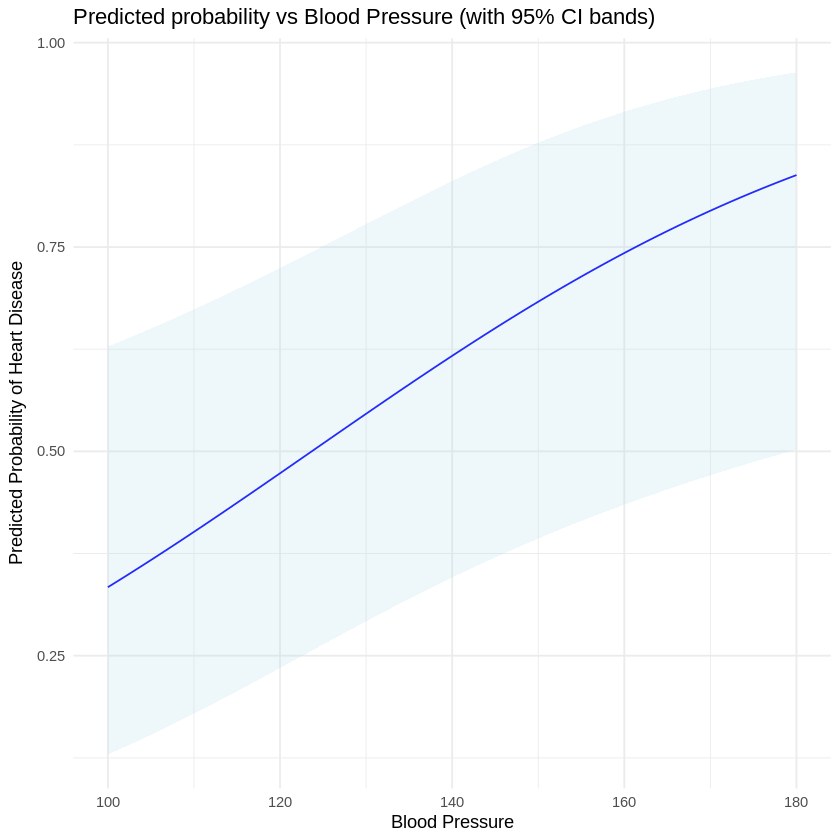

In [ ]:
# Plot
ggplot(pd_full, aes(x = blood_pressure, y = prob)) +
  geom_line(color = "blue") +
  geom_ribbon(aes(ymin = lower, ymax = upper), alpha = 0.2, fill = "lightblue") +
  labs(x = "Blood Pressure", y = "Predicted Probability of Heart Disease",
       title = "Predicted probability vs Blood Pressure (with 95% CI bands)") +
  theme_minimal()

In [ ]:
pred_probs <- predict(final_reduced_model, newdata = data_test, type = "response")

data_test$predicted_prob <- pred_probs

data_test

age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,ex_angina,st_depression,st_slope,num_vessels,thal,disease,predicted_prob
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
66,male,asymptomatic,160,228,<120 mg/ml,LVH (Estes criteria),138,No,2.3,upsloping,0,fixed defect,No disease,0.71304774
71,female,asymptomatic,112,149,<120 mg/ml,normal,125,No,1.6,flat,0,normal,No disease,0.33311539
64,male,typical angina,170,227,<120 mg/ml,LVH (Estes criteria),155,No,0.6,flat,0,reversible defect,No disease,0.60292310
66,female,non-anginal pain,146,278,<120 mg/ml,LVH (Estes criteria),152,No,0.0,flat,1,normal,No disease,0.20400384
39,female,non-anginal pain,138,220,<120 mg/ml,normal,152,No,0.0,flat,0,normal,No disease,0.01979231
58,female,asymptomatic,130,197,<120 mg/ml,normal,131,No,0.6,flat,0,normal,No disease,0.30550073
47,male,non-anginal pain,130,253,<120 mg/ml,normal,179,No,0.0,upsloping,0,normal,No disease,0.01016356
35,male,atypical angina,122,192,<120 mg/ml,normal,174,No,0.0,upsloping,0,normal,No disease,0.02888787
58,male,atypical angina,125,220,<120 mg/ml,normal,144,No,0.4,flat,4,reversible defect,No disease,0.81286349


Based on the training data, choose a suitable threshold for classifying disease vs. no disease. On the test data, compute Accuracy and draw the ROC curve.

In [ ]:
install.packages("pROC")
library(pROC)

roc_train <- roc(data_train$disease,
                 predict(final_reduced_model, newdata = data_train, type = "response"))

# best threshold
best_coords <- coords(roc_train, "best", ret = "threshold", best.method = "youden")
best_coords

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Setting levels: control = No disease, case = Disease

Setting direction: controls < cases



threshold
<dbl>
0.4589902


In [ ]:
best_threshold <- as.numeric(best_coords)

data_test$predicted_class <- ifelse(pred_probs >= best_threshold, "desease", "no desease")
data_test

age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,ex_angina,st_depression,st_slope,num_vessels,thal,disease,predicted_prob,predicted_class
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
66,male,asymptomatic,160,228,<120 mg/ml,LVH (Estes criteria),138,No,2.3,upsloping,0,fixed defect,No disease,0.71304774,desease
71,female,asymptomatic,112,149,<120 mg/ml,normal,125,No,1.6,flat,0,normal,No disease,0.33311539,no desease
64,male,typical angina,170,227,<120 mg/ml,LVH (Estes criteria),155,No,0.6,flat,0,reversible defect,No disease,0.60292310,desease
66,female,non-anginal pain,146,278,<120 mg/ml,LVH (Estes criteria),152,No,0.0,flat,1,normal,No disease,0.20400384,no desease
39,female,non-anginal pain,138,220,<120 mg/ml,normal,152,No,0.0,flat,0,normal,No disease,0.01979231,no desease
58,female,asymptomatic,130,197,<120 mg/ml,normal,131,No,0.6,flat,0,normal,No disease,0.30550073,no desease
47,male,non-anginal pain,130,253,<120 mg/ml,normal,179,No,0.0,upsloping,0,normal,No disease,0.01016356,no desease
35,male,atypical angina,122,192,<120 mg/ml,normal,174,No,0.0,upsloping,0,normal,No disease,0.02888787,no desease
58,male,atypical angina,125,220,<120 mg/ml,normal,144,No,0.4,flat,4,reversible defect,No disease,0.81286349,desease


In [ ]:
conf_matrix <- table(Predicted = data_test$predicted_class, Actual = data_test$disease)
conf_matrix


            Actual
Predicted    No disease Disease
  desease             3      12
  no desease         11       4

accuracy:

In [ ]:
(12+11)/(3+12+11+4)

[1] 0.7666667

sensitivity:

In [ ]:
12/(4+12)

[1] 0.75

Setting levels: control = No disease, case = Disease

Setting direction: controls < cases



Area under the curve: 0.846

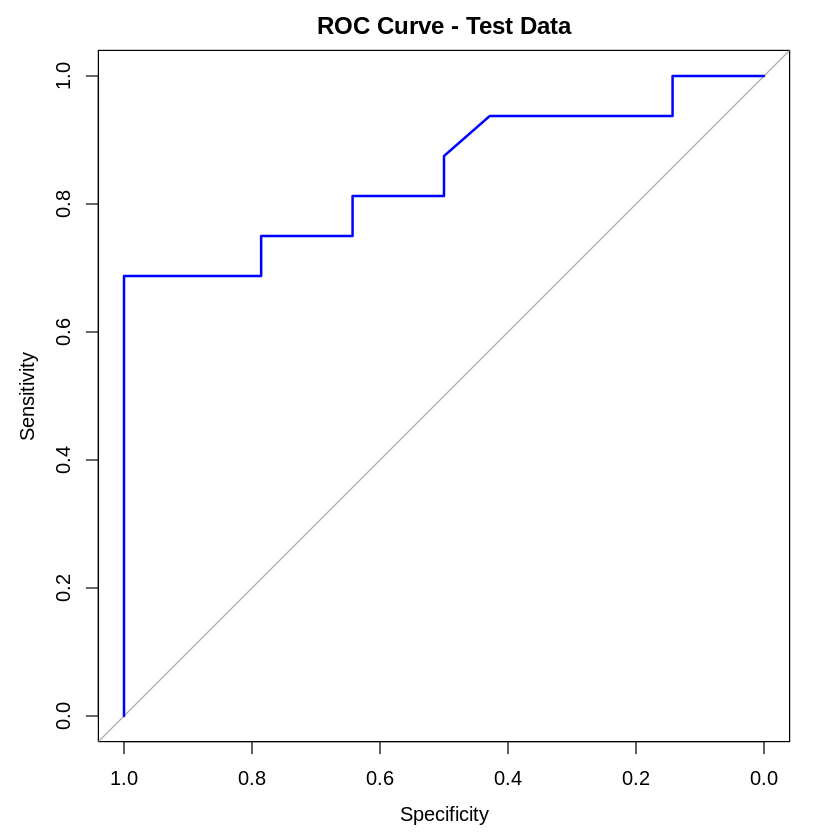

In [ ]:
roc_test <- roc(data_test$disease, pred_probs)

plot(roc_test, col = "blue", main = "ROC Curve - Test Data")
auc(roc_test)

If we randomly pick one patient with heart disease and one without the model has 85% chance of assigning a higher probability to the patient with disease which is very good for test data.

## 05 - Logistická regrese -  su


In [ ]:
install.packages('tidymodels')
install.packages('glmnet')
library(tidymodels)
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘sparsevctrs’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tailor’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘RcppEigen’


── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.10     ✔ rsample      1.3.1 
✔ dials        1.4.2      ✔ tailor       0.1.0 
✔ infer        1.0.9      ✔ tune         2.0.0 
✔ modeldata    1.5.1      ✔ workflows    1.3.0 
✔ parsnip      1.3.3      ✔ workflowsets

* Build a **pipeline** on the **training data** for logistic regression with **elastic-net regularization** that includes:
  * Variable preparation: transformations, one-hot encoding, normalization, etc.
  * Hyper-parameter search for the “optimal” regularization settings.
  * **k-fold cross-validation**.

* Using the pipeline/workflow, choose the hyper-parameter value. If the goal is to **detect patients with heart disease**, which statistic should we focus on to avoid **sending a sick patient home as healthy** (i.e., minimize this error)?

* Compute and compare common **binary-classification metrics** on the **training** and **test** sets. Plot the **ROC curve** and compute the **AUC** for both the training and test data. What can we say about the model from **Section 05** compared to the model from **Section 04**?


In [ ]:
lr_mod <- logistic_reg(
  penalty = tune(),  # we will find the optimal penalty
  mixture = 0.5      # elastic-net (mix of L1 and L2)
) %>%
  set_engine("glmnet") %>%
  set_mode("classification")


heart_recipe <- recipe(disease ~ ., data = data_train) %>%
  step_impute_mode(all_nominal(), -all_outcomes()) %>%  # most frequent level for factors
  step_impute_median(all_numeric(), -all_outcomes()) %>% # median for numeric
  step_unknown(all_nominal(), -all_outcomes()) %>%       # for unseen levels in test/folds
  step_dummy(all_nominal(), -all_outcomes()) %>%         # one-hot encoding
  step_normalize(all_numeric(), -all_outcomes()) %>%     # scale numeric
  step_zv(all_predictors())                              # remove zero-variance predictors


lr_workflow <- workflow() %>%
  add_model(lr_mod) %>%
  add_recipe(heart_recipe)


lr_reg_grid <- tibble(
  penalty = 10^seq(-4, -0.5, length.out = 20)  # 20 values from 0.0001 to ~0.3
)


set.seed(123)
heart_folds <- vfold_cv(data_train, v = 5, strata = disease)

lr_res <- lr_workflow %>%
  tune_grid(
    resamples = heart_folds,
    grid = lr_reg_grid,
    metrics = metric_set(roc_auc, accuracy, sensitivity, specificity),
    control = control_grid(save_pred = TRUE, verbose = TRUE)
  )



i Fold1: preprocessor 1/1

→ A | warning: !  The following columns have zero variance so scaling cannot be used:
                 sex_unknown, chest_pain_type_unknown, blood_sugar_unknown, rest_ecg_unknown,
                 ex_angina_unknown, st_slope_unknown, num_vessels_unknown, and thal_unknown.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.

i Fold1: preprocessor 1/1, model 1/1

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold1: prepro

In [ ]:
collect_metrics(lr_res) %>%
  filter(.metric == "roc_auc") %>%
  arrange(desc(mean))


penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
0.0162377674,roc_auc,binary,0.9141000,5,0.01648801,pre0_mod13_post0
0.0106246783,roc_auc,binary,0.9135222,5,0.01603547,pre0_mod12_post0
0.0069519280,roc_auc,binary,0.9126889,5,0.01599866,pre0_mod11_post0
0.0019474830,roc_auc,binary,0.9121000,5,0.01447580,pre0_mod08_post0
0.0008337822,roc_auc,binary,0.9118333,5,0.01336787,pre0_mod06_post0
0.0379269019,roc_auc,binary,0.9116889,5,0.01951428,pre0_mod15_post0
0.0248162892,roc_auc,binary,0.9116667,5,0.01764050,pre0_mod14_post0
0.0029763514,roc_auc,binary,0.9115556,5,0.01512835,pre0_mod09_post0
0.0012742750,roc_auc,binary,0.9113000,5,0.01342990,pre0_mod07_post0


highest mean ROC AUC is 0.9141 at penalty = 0.0162

In [ ]:
best_penalty <- lr_res %>%
  collect_metrics() %>%
  filter(.metric == "roc_auc") %>%
  arrange(desc(mean)) %>%
  slice(1) %>%
  pull(penalty)

In [ ]:
final_lr <- lr_workflow %>%
  finalize_workflow(parameters = tibble(penalty = best_penalty))


In [ ]:
final_fit <- final_lr %>%
  fit(data = data_train)

Warning message:
“!  The following columns have zero variance so scaling cannot be used:
  sex_unknown, chest_pain_type_unknown, blood_sugar_unknown, rest_ecg_unknown,
  ex_angina_unknown, st_slope_unknown, num_vessels_unknown, and thal_unknown.
ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
  before normalizing.”


In [ ]:
train_pred <- predict(final_fit, data_train, type = "prob") %>%
  bind_cols(data_train %>% select(disease))

test_pred <- predict(final_fit, data_test, type = "prob") %>%
  bind_cols(data_test %>% select(disease))


Train predictions

In [ ]:
train_pred

.pred_No disease,.pred_Disease,disease
<dbl>,<dbl>,<fct>
0.7710745,0.22892549,No disease
0.9271003,0.07289967,No disease
0.9460277,0.05397226,No disease
0.9391038,0.06089622,No disease
0.8929177,0.10708234,No disease
0.4768619,0.52313806,No disease
0.8233965,0.17660347,No disease
0.8246701,0.17532994,No disease
0.7749130,0.22508701,No disease


Test predictions

In [ ]:
test_pred

.pred_No disease,.pred_Disease,disease,.pred_class
<dbl>,<dbl>,<fct>,<fct>
0.35824969,0.64175031,No disease,NA
0.73561966,0.26438034,No disease,NA
0.38647220,0.61352780,No disease,NA
0.74156373,0.25843627,No disease,NA
0.95457469,0.04542531,No disease,NA
0.75699788,0.24300212,No disease,NA
0.97272484,0.02727516,No disease,NA
0.94773703,0.05226297,No disease,NA
0.50050195,0.49949805,No disease,NA


We should focus on sensitivity to avoid sending a sick patient home as healthy.

In [ ]:
train_pred <- train_pred %>%
  mutate(.pred_class = factor(
    if_else(.pred_Disease > 0.5, "Disease", "No disease"),
    levels = levels(data_train$disease)  # make sure levels match the outcome
  ))

test_pred <- test_pred %>%
  mutate(.pred_class = factor(
    if_else(.pred_Disease > 0.5, "Disease", "No disease"),
    levels = levels(data_train$disease)
  ))


In [ ]:
metrics_train <- bind_rows(
  roc_auc(train_pred, truth = disease, .pred_Disease),
  accuracy(train_pred, truth = disease, estimate = .pred_class),
  sensitivity(train_pred, truth = disease, estimate = .pred_class),
  specificity(train_pred, truth = disease, estimate = .pred_class)
) %>%
  mutate(dataset = "train")

metrics_test <- bind_rows(
  roc_auc(test_pred, truth = disease, .pred_Disease),
  accuracy(test_pred, truth = disease, estimate = .pred_class),
  sensitivity(test_pred, truth = disease, estimate = .pred_class),
  specificity(test_pred, truth = disease, estimate = .pred_class)
) %>%
  mutate(dataset = "test")

all_metrics <- bind_rows(metrics_train, metrics_test)
all_metrics


.metric,.estimator,.estimate,dataset
<chr>,<chr>,<dbl>,<chr>
roc_auc,binary,0.9449864,train
accuracy,binary,0.8717949,train
sensitivity,binary,0.8211382,train
specificity,binary,0.9133333,train
roc_auc,binary,0.8504464,test
accuracy,binary,0.8000000,test
sensitivity,binary,0.7500000,test
specificity,binary,0.8571429,test


Setting levels: control = Disease, case = No disease

Setting direction: controls > cases



Area under the curve: 0.945

Setting levels: control = Disease, case = No disease

Setting direction: controls > cases



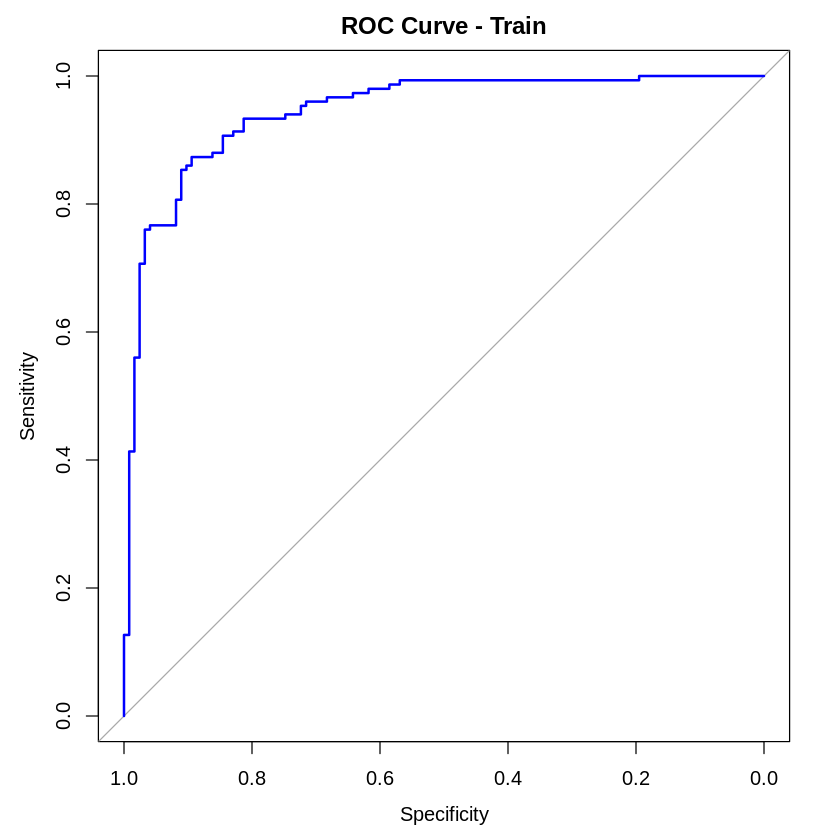

Area under the curve: 0.8504

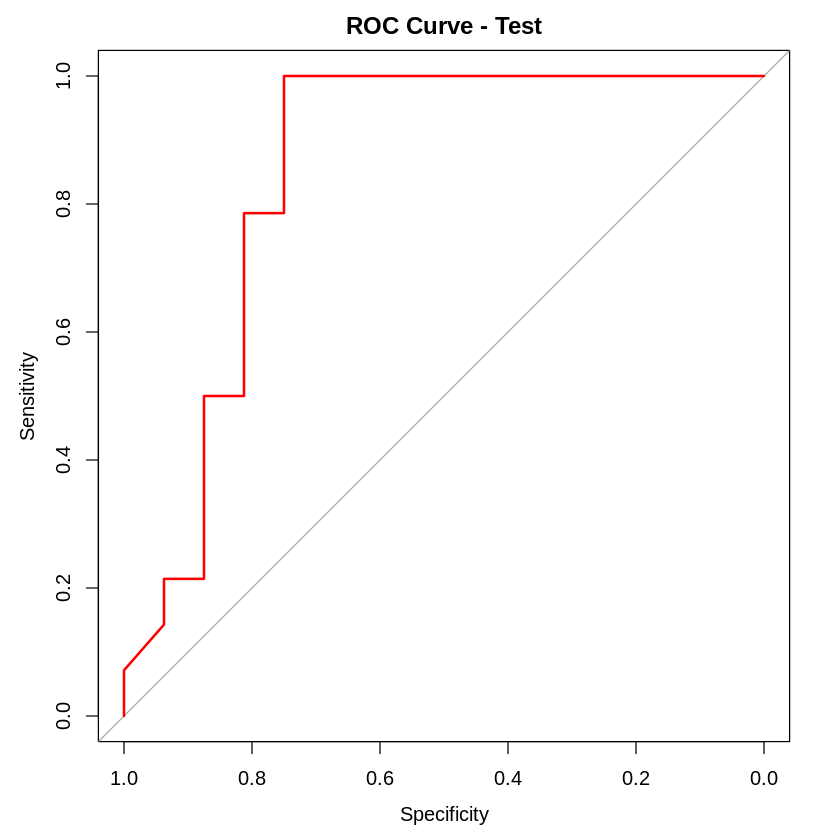

In [ ]:
library(pROC)

# Training ROC
roc_train <- roc(train_pred$disease, train_pred$.pred_Disease)
plot(roc_train, col = "blue", main = "ROC Curve - Train")
auc(roc_train)

roc_test <- roc(test_pred$disease, test_pred$.pred_Disease)
plot(roc_test, col = "red", main = "ROC Curve - Test")
auc(roc_test)


Models in section 5 and 4 are describing data well especially accordin to sensitivity and ROC AUC metrics.